In [2]:
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting
from sklearn.preprocessing import StandardScaler  # For data normalization
from sklearn.model_selection import train_test_split  # For splitting the data
from sklearn.ensemble import RandomForestClassifier  # For building the model
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc  # For model evaluation

In [3]:
import pandas as pd

# Load your data with a different encoding
file_path = 'pregnancy risk prediction data set.csv'  # Ensure this file path is correct
data = pd.read_csv(file_path, encoding='latin1', engine='python')

# Display basic information about the dataset
print("Dataset Info:")
print(data.info())

# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Display the first few rows
print("\nFirst Few Rows:")
print(data.head())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6103 entries, 0 to 6102
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Patient ID                         6103 non-null   int64  
 1   Name                               6103 non-null   object 
 2   Age                                6103 non-null   int64  
 3   Body Temperature(F)                6103 non-null   float64
 4   Heart rate(bpm)                    6103 non-null   int64  
 5   Systolic Blood Pressure(mm Hg)     6103 non-null   int64  
 6   Diastolic Blood Pressure(mm Hg)    6103 non-null   int64  
 7   BMI(kg/m 2)                        6103 non-null   float64
 8   Blood Glucose(HbA1c)               6103 non-null   int64  
 9   Blood Glucose(Fasting hour-mg/dl)  6103 non-null   float64
 10  Outcome                            6103 non-null   object 
dtypes: float64(3), int64(6), object(2)
memory 

In [5]:
# Convert relevant columns to numeric types
numeric_columns = [
    'Age', 'Body Temperature(F)', 'Heart rate(bpm)', 
    'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)', 
    'BMI(kg/m^2)', 'Blood Glucose(HbA1c)', 'Blood Glucose(Fasting hour-mg/dl)'
]

for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Convert categorical columns to category type
data['Outcome'] = data['Outcome'].astype('category')

# Display info after type conversion
print("Dataset Info After Type Conversion:")
print(data.info())


Dataset Info After Type Conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6104 entries, 0 to 6103
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Patient ID                         6104 non-null   object  
 1   Name                               6104 non-null   object  
 2   Age                                6103 non-null   float64 
 3   Body Temperature(F)                6103 non-null   float64 
 4   Heart rate(bpm)                    6103 non-null   float64 
 5   Systolic Blood Pressure(mm Hg)     6103 non-null   float64 
 6   Diastolic Blood Pressure(mm Hg)    6103 non-null   float64 
 7   BMI(kg/m^2)                        6103 non-null   float64 
 8   Blood Glucose(HbA1c)               6103 non-null   float64 
 9   Blood Glucose(Fasting hour-mg/dl)  6103 non-null   float64 
 10  Outcome                            6104 non-null   category
dtypes: cate

In [6]:
# Check for missing values again
print("Missing Values After Conversion:")
print(data.isnull().sum())

# Impute missing values for numeric columns with mean
for col in numeric_columns:
    data[col].fillna(data[col].mean(), inplace=True)

# Display info after handling missing values
print("Dataset Info After Handling Missing Values:")
print(data.info())


Missing Values After Conversion:
Patient ID                           0
Name                                 0
Age                                  1
Body Temperature(F)                  1
Heart rate(bpm)                      1
Systolic Blood Pressure(mm Hg)       1
Diastolic Blood Pressure(mm Hg)      1
BMI(kg/m^2)                          1
Blood Glucose(HbA1c)                 1
Blood Glucose(Fasting hour-mg/dl)    1
Outcome                              0
dtype: int64
Dataset Info After Handling Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6104 entries, 0 to 6103
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Patient ID                         6104 non-null   object  
 1   Name                               6104 non-null   object  
 2   Age                                6104 non-null   float64 
 3   Body Temperature(F)                6104 non-

C:\Users\anjal\AppData\Local\Temp\ipykernel_14164\1248106101.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


In [7]:
# Check for duplicates
duplicate_rows = data.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

# Remove duplicates
data.drop_duplicates(inplace=True)

# Display info after removing duplicates
print("Dataset Info After Removing Duplicates:")
print(data.info())


Number of duplicate rows: 0
Dataset Info After Removing Duplicates:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6104 entries, 0 to 6103
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Patient ID                         6104 non-null   object  
 1   Name                               6104 non-null   object  
 2   Age                                6104 non-null   float64 
 3   Body Temperature(F)                6104 non-null   float64 
 4   Heart rate(bpm)                    6104 non-null   float64 
 5   Systolic Blood Pressure(mm Hg)     6104 non-null   float64 
 6   Diastolic Blood Pressure(mm Hg)    6104 non-null   float64 
 7   BMI(kg/m^2)                        6104 non-null   float64 
 8   Blood Glucose(HbA1c)               6104 non-null   float64 
 9   Blood Glucose(Fasting hour-mg/dl)  6104 non-null   float64 
 10  Outcome                            6104 

In [8]:
# Example: Convert all string columns to lowercase
data['Name'] = data['Name'].str.lower()

# Display info after standardizing data
print("Dataset Info After Standardizing Data:")
print(data.info())


Dataset Info After Standardizing Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6104 entries, 0 to 6103
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Patient ID                         6104 non-null   object  
 1   Name                               6104 non-null   object  
 2   Age                                6104 non-null   float64 
 3   Body Temperature(F)                6104 non-null   float64 
 4   Heart rate(bpm)                    6104 non-null   float64 
 5   Systolic Blood Pressure(mm Hg)     6104 non-null   float64 
 6   Diastolic Blood Pressure(mm Hg)    6104 non-null   float64 
 7   BMI(kg/m^2)                        6104 non-null   float64 
 8   Blood Glucose(HbA1c)               6104 non-null   float64 
 9   Blood Glucose(Fasting hour-mg/dl)  6104 non-null   float64 
 10  Outcome                            6104 non-null   category
dtypes: c

C:\Users\anjal\AppData\Local\Temp\ipykernel_14164\3707701897.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=True, palette="coolwarm")


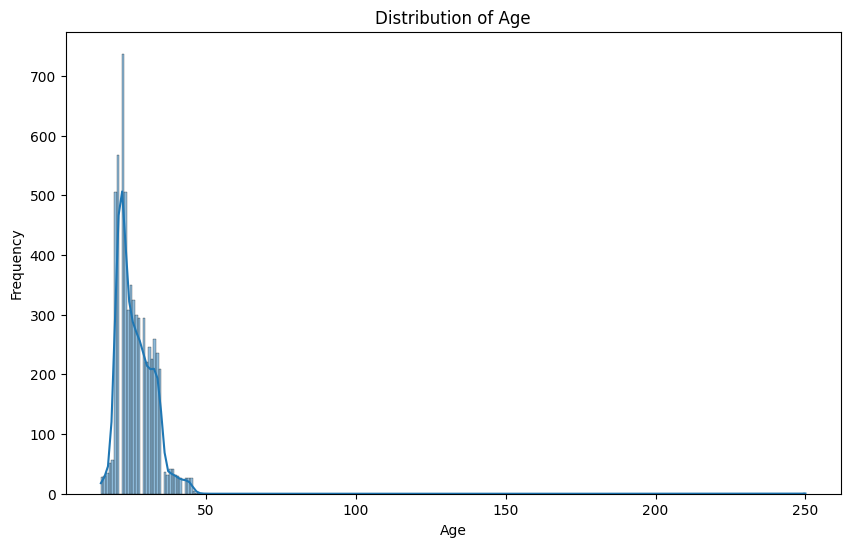

C:\Users\anjal\AppData\Local\Temp\ipykernel_14164\3707701897.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=True, palette="coolwarm")


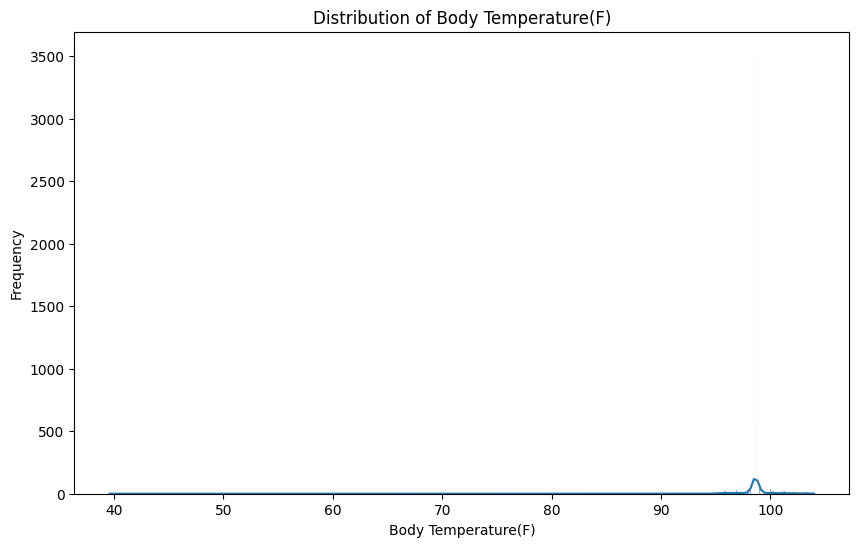

C:\Users\anjal\AppData\Local\Temp\ipykernel_14164\3707701897.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=True, palette="coolwarm")


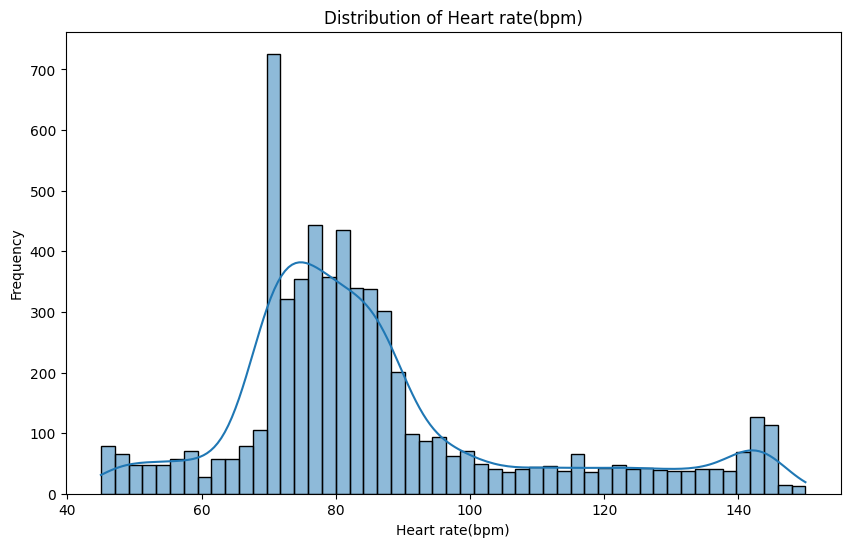

C:\Users\anjal\AppData\Local\Temp\ipykernel_14164\3707701897.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=True, palette="coolwarm")


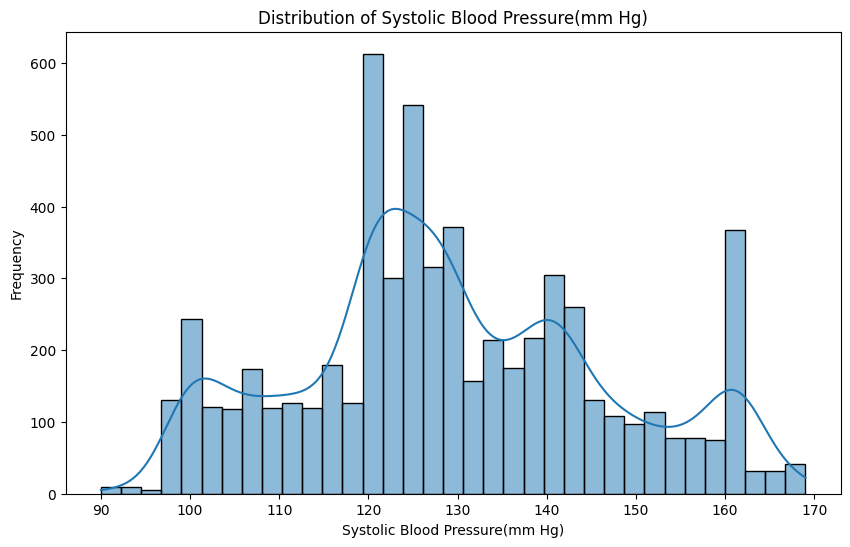

C:\Users\anjal\AppData\Local\Temp\ipykernel_14164\3707701897.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=True, palette="coolwarm")


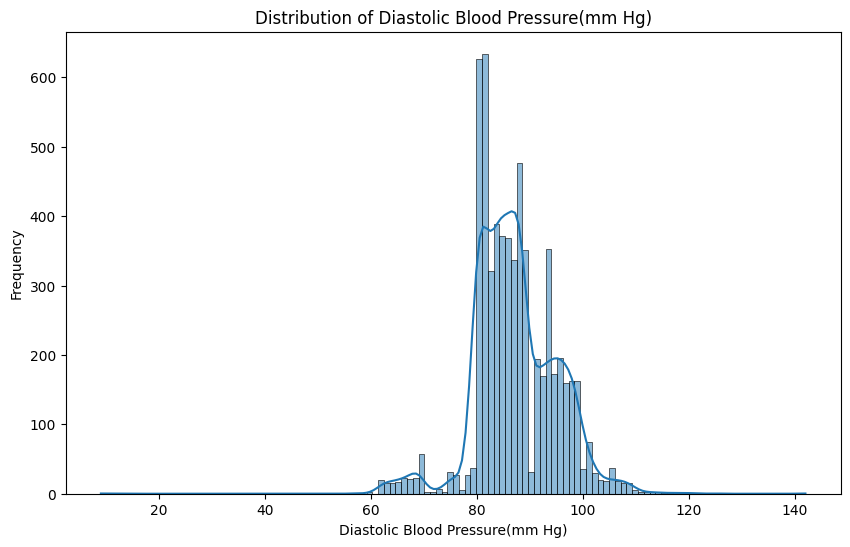

C:\Users\anjal\AppData\Local\Temp\ipykernel_14164\3707701897.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=True, palette="coolwarm")


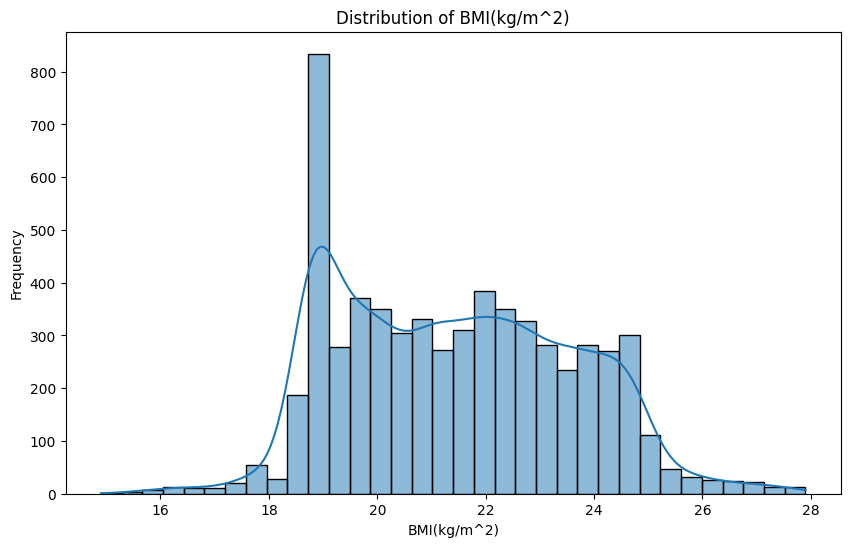

C:\Users\anjal\AppData\Local\Temp\ipykernel_14164\3707701897.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=True, palette="coolwarm")


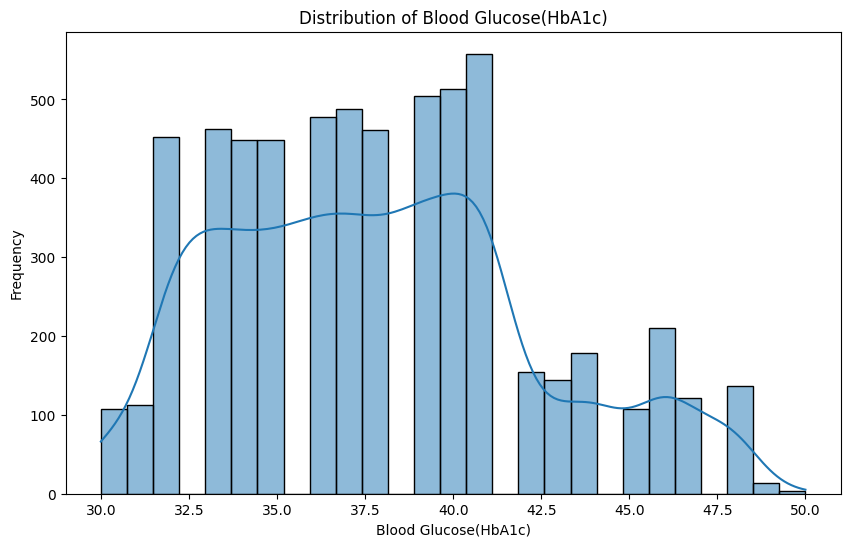

C:\Users\anjal\AppData\Local\Temp\ipykernel_14164\3707701897.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=True, palette="coolwarm")


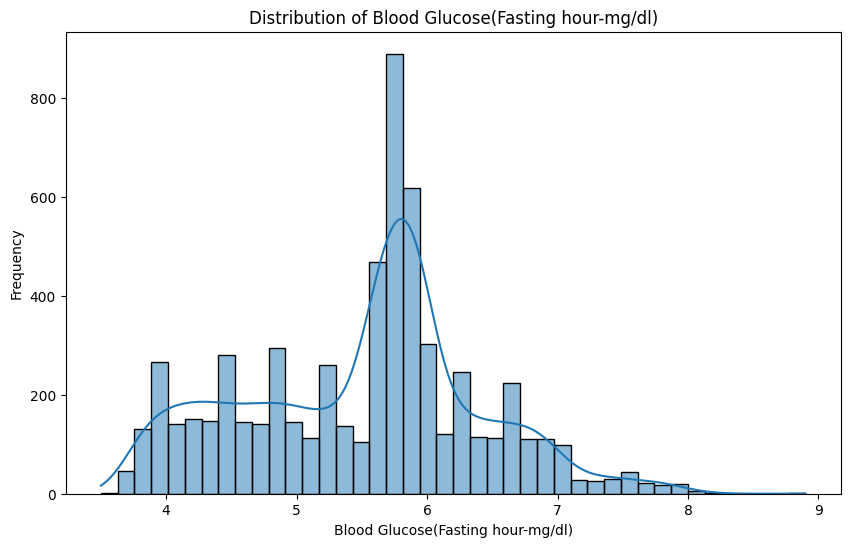

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the distribution of each feature
for feature in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=feature, kde=True, palette="coolwarm")
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


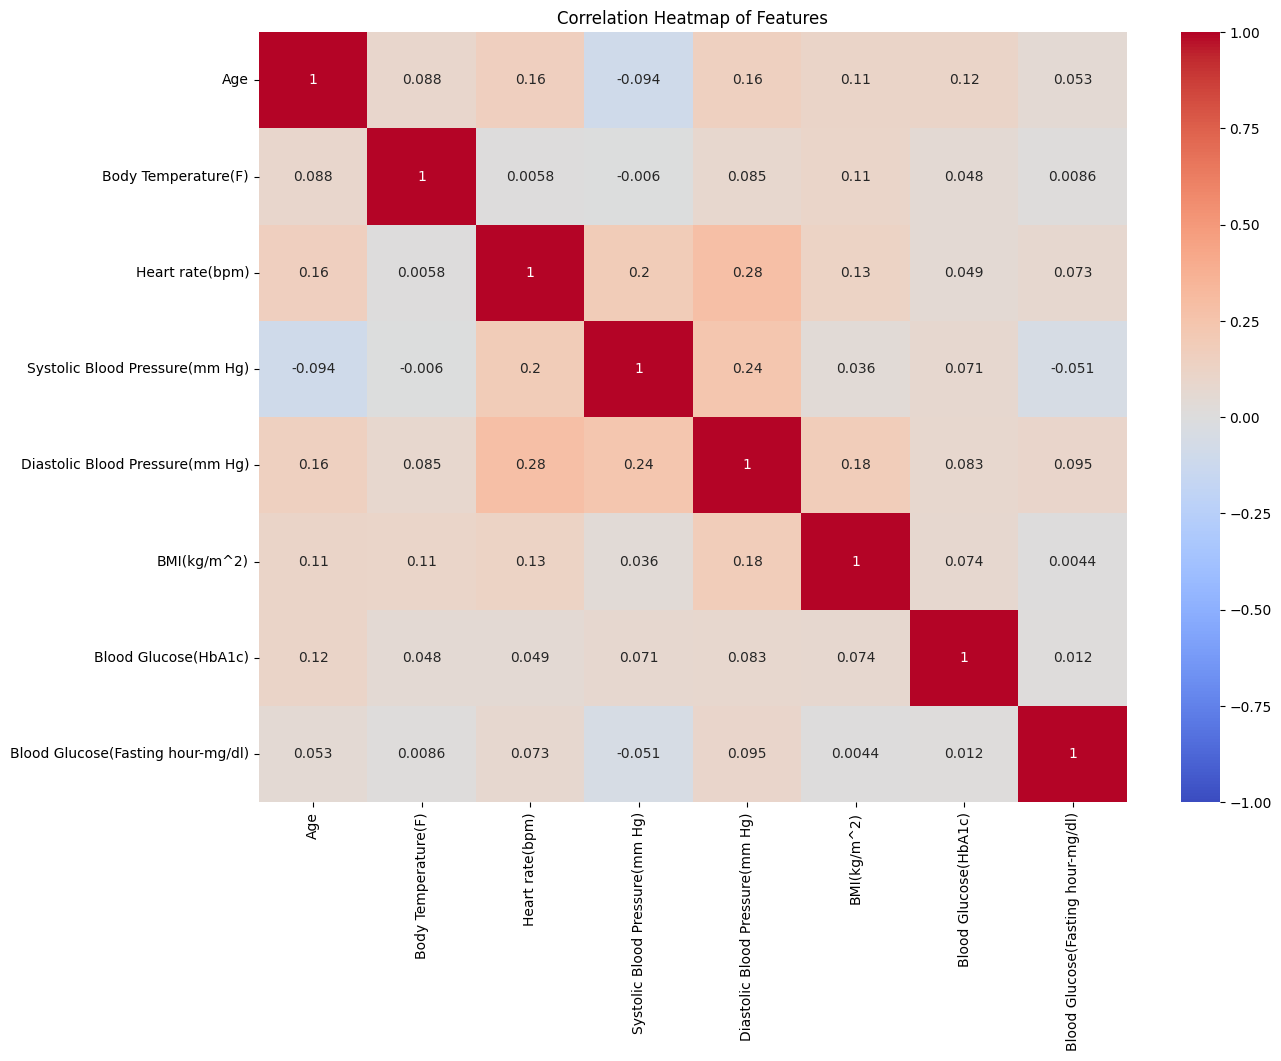

In [10]:
# Heatmap to visualize correlations between features
plt.figure(figsize=(14, 10))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Features')
plt.show()


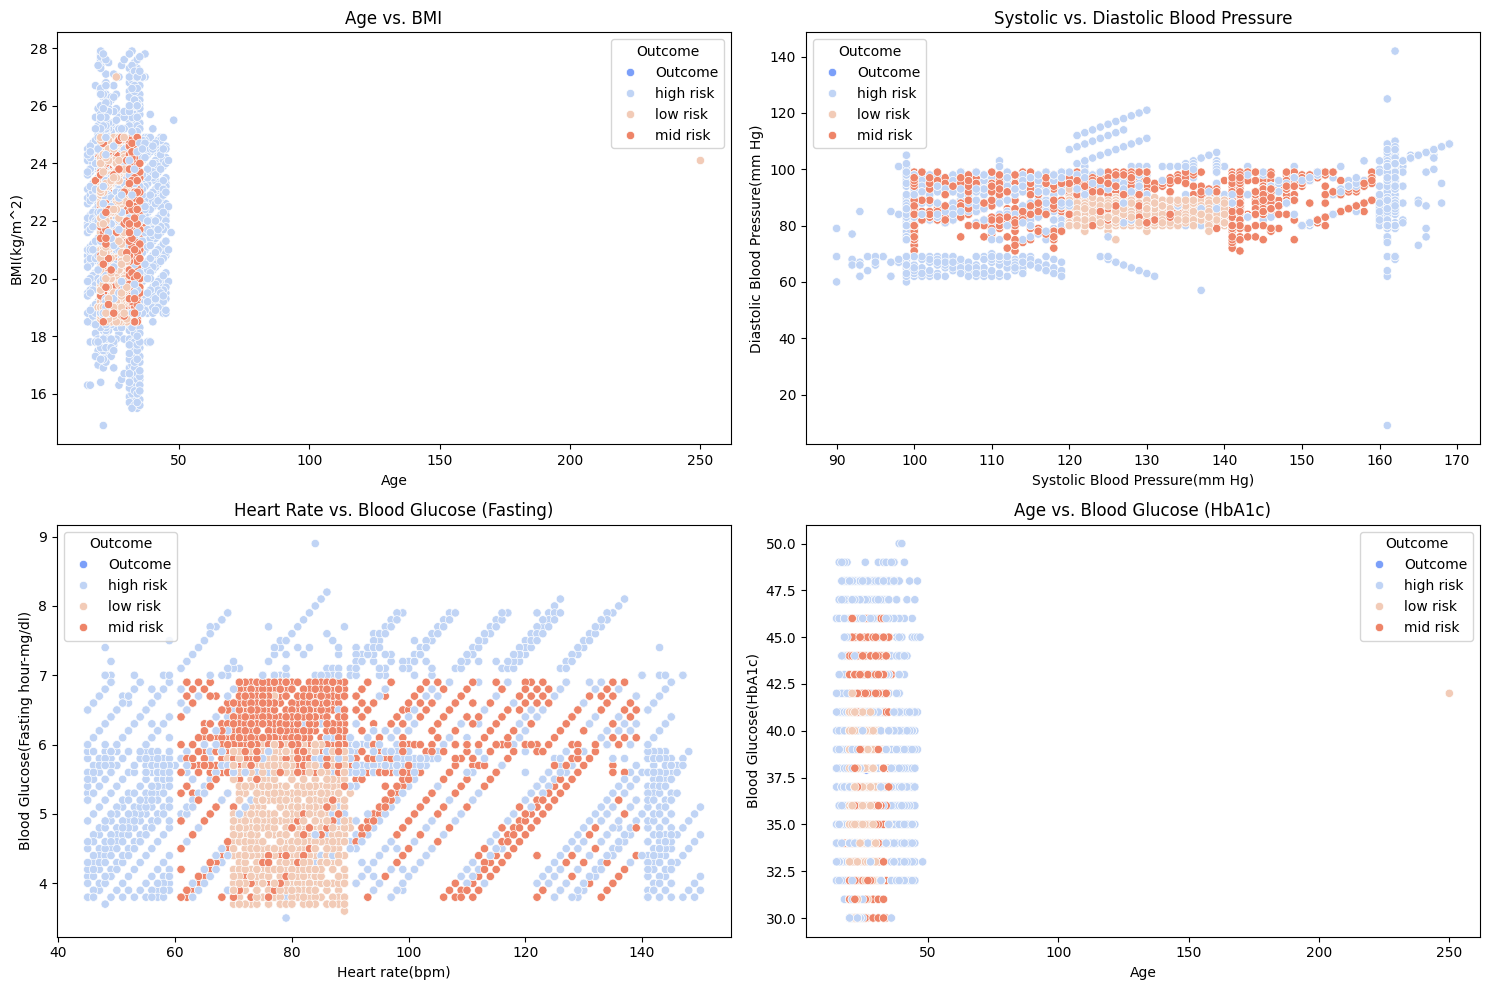

In [11]:
# Scatter plot for different combinations of features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

sns.scatterplot(data=data, x='Age', y='BMI(kg/m^2)', hue='Outcome', palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('Age vs. BMI')

sns.scatterplot(data=data, x='Systolic Blood Pressure(mm Hg)', y='Diastolic Blood Pressure(mm Hg)', hue='Outcome', palette='coolwarm', ax=axes[0, 1])
axes[0, 1].set_title('Systolic vs. Diastolic Blood Pressure')

sns.scatterplot(data=data, x='Heart rate(bpm)', y='Blood Glucose(Fasting hour-mg/dl)', hue='Outcome', palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Heart Rate vs. Blood Glucose (Fasting)')

sns.scatterplot(data=data, x='Age', y='Blood Glucose(HbA1c)', hue='Outcome', palette='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Age vs. Blood Glucose (HbA1c)')

plt.tight_layout()
plt.show()


In [12]:
from scipy import stats
import numpy as np

# Function to detect outliers using Z-score
def detect_outliers_zscore(data, threshold=3):
    outliers = []
    for col in numeric_columns:
        z_scores = np.abs(stats.zscore(data[col]))
        outliers_in_col = np.where(z_scores > threshold)
        outliers.append((col, data.iloc[outliers_in_col[0]]))
    return outliers

outliers_zscore = detect_outliers_zscore(data)
for feature, outliers in outliers_zscore:
    print(f"\nOutliers in {feature} (Z-score method):")
    print(outliers)



Outliers in Age (Z-score method):
     Patient ID       Name    Age  Body Temperature(F)  Heart rate(bpm)  \
135     2003689  kundhavai  250.0                 98.6             76.0   
2283    2002049    lavangi   46.0                 98.6             84.0   
3613    2002952  vibhavari   46.0                 98.6             75.0   
3794    1994669      nihan   46.0                 98.2            123.0   
4827    2002317       jeya   47.0                102.0             91.0   
5159    1994023   maanasvi   46.0                 99.9            139.0   
5486    2012371    rupashi   48.0                 98.8            102.0   

      Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
135                            126.0                             85.0   
2283                           134.0                             81.0   
3613                           120.0                             88.0   
3794                           119.0                             67.0   

In [13]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data):
    outliers = []
    for col in numeric_columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_in_col = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outliers.append((col, outliers_in_col))
    return outliers

outliers_iqr = detect_outliers_iqr(data)
for feature, outliers in outliers_iqr:
    print(f"\nOutliers in {feature} (IQR method):")
    print(outliers)



Outliers in Age (IQR method):
     Patient ID       Name    Age  Body Temperature(F)  Heart rate(bpm)  \
2       2001562       soni   45.0                 97.7             99.0   
122     2003321      tulya   43.0                 97.9            120.0   
135     2003689  kundhavai  250.0                 98.6             76.0   
268     2003620        omi   44.0                 97.6            145.0   
373     2012137  laalithya   45.0                102.1             49.0   
...         ...        ...    ...                  ...              ...   
5865    1994573   rikvitha   44.0                 98.0            121.0   
5935    2001617       bela   45.0                 97.7            141.0   
5958    2002552    ekshika   44.0                 96.4            144.0   
6035    2002187    bharati   43.0                 99.6            136.0   
6040    2011825      mutha   44.0                103.1             57.0   

      Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg

C:\Users\anjal\AppData\Local\Temp\ipykernel_14164\2551729441.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], palette="coolwarm")


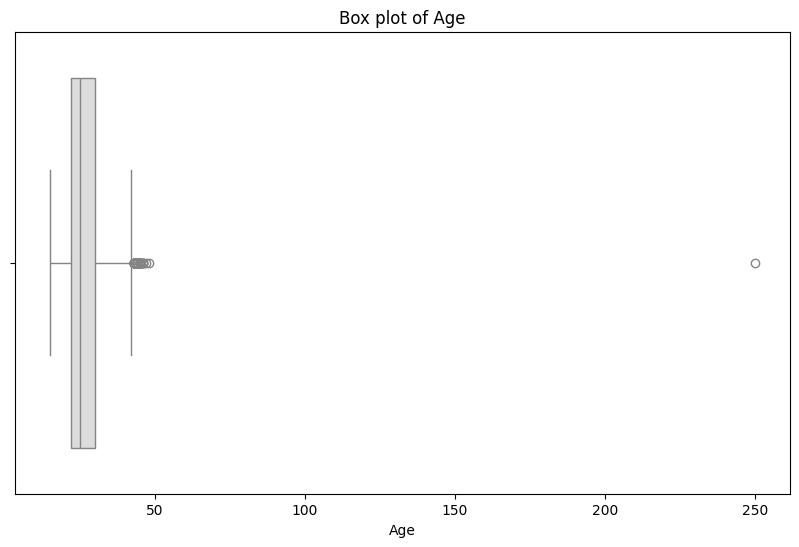

C:\Users\anjal\AppData\Local\Temp\ipykernel_14164\2551729441.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], palette="coolwarm")


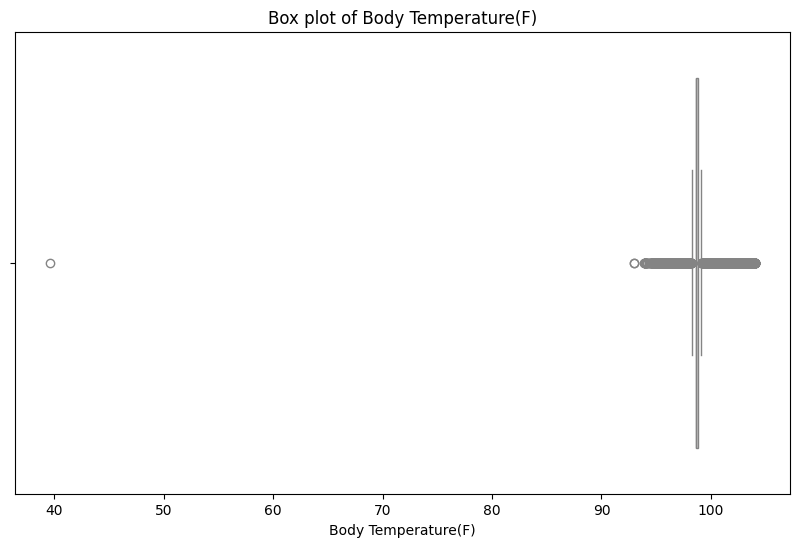

C:\Users\anjal\AppData\Local\Temp\ipykernel_14164\2551729441.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], palette="coolwarm")


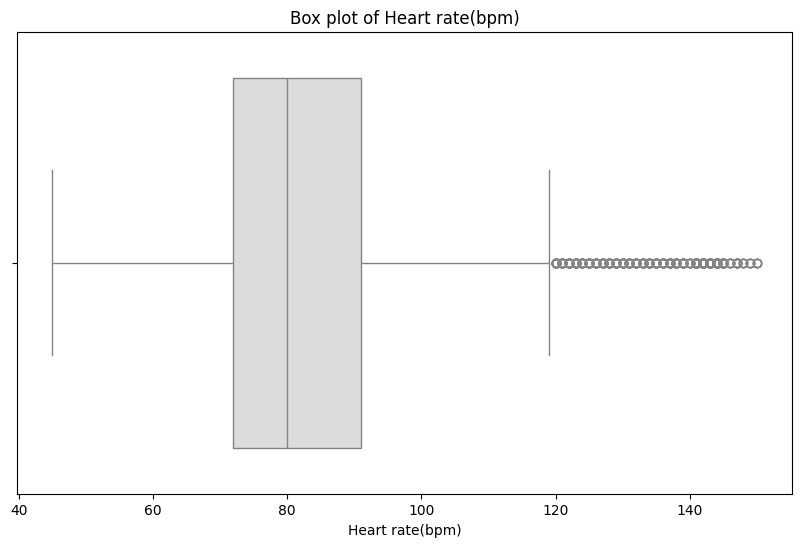

C:\Users\anjal\AppData\Local\Temp\ipykernel_14164\2551729441.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], palette="coolwarm")


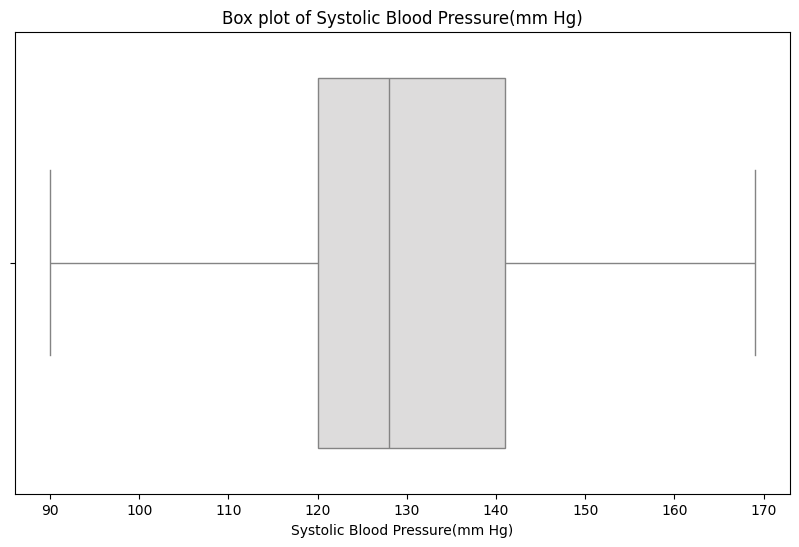

C:\Users\anjal\AppData\Local\Temp\ipykernel_14164\2551729441.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], palette="coolwarm")


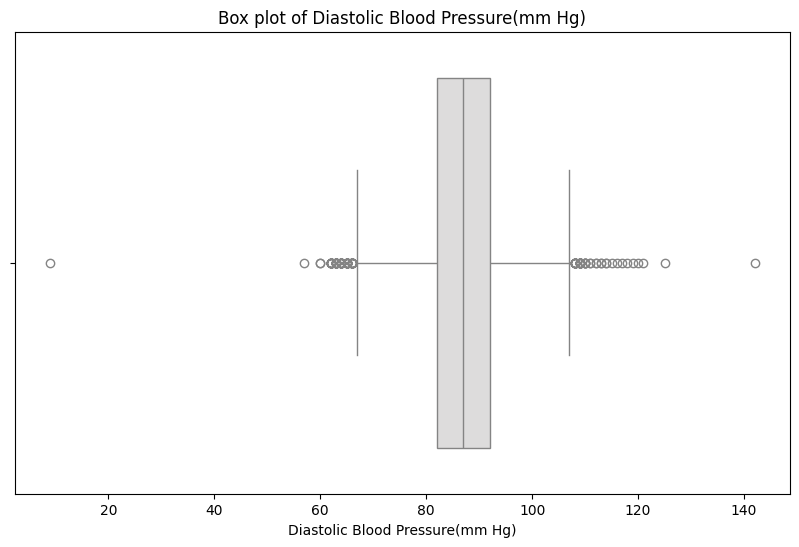

C:\Users\anjal\AppData\Local\Temp\ipykernel_14164\2551729441.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], palette="coolwarm")


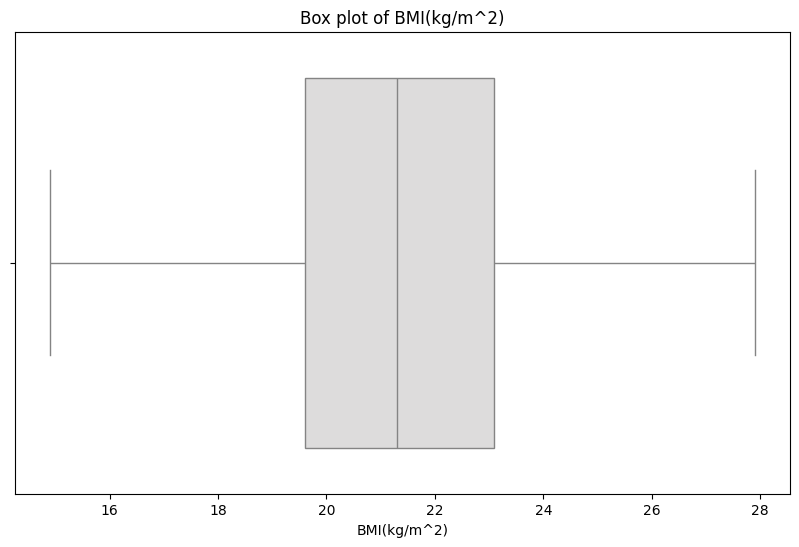

C:\Users\anjal\AppData\Local\Temp\ipykernel_14164\2551729441.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], palette="coolwarm")


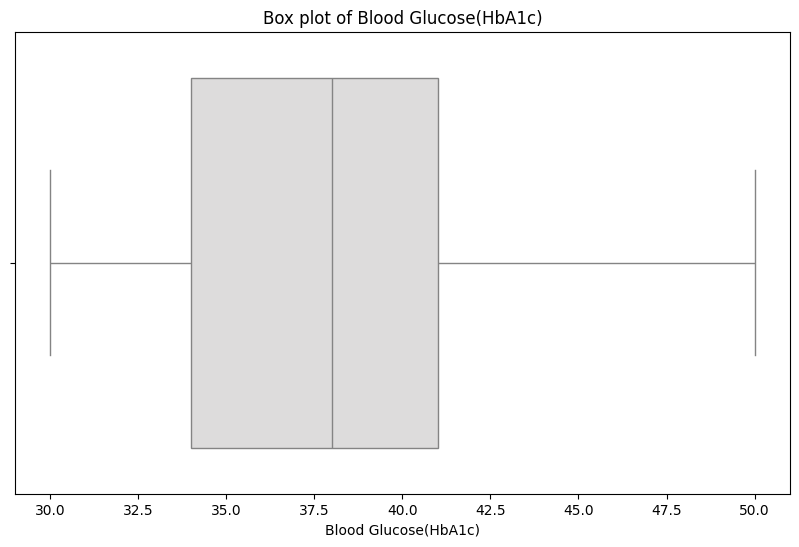

C:\Users\anjal\AppData\Local\Temp\ipykernel_14164\2551729441.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], palette="coolwarm")


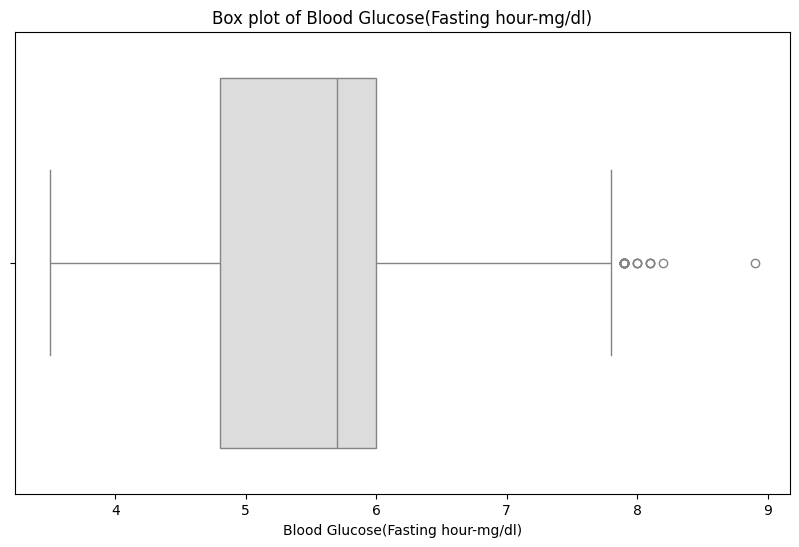

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing outliers using box plots
for feature in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[feature], palette="coolwarm")
    plt.title(f'Box plot of {feature}')
    plt.show()


C:\Users\anjal\AppData\Local\Temp\ipykernel_14164\3760669183.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], palette="coolwarm")


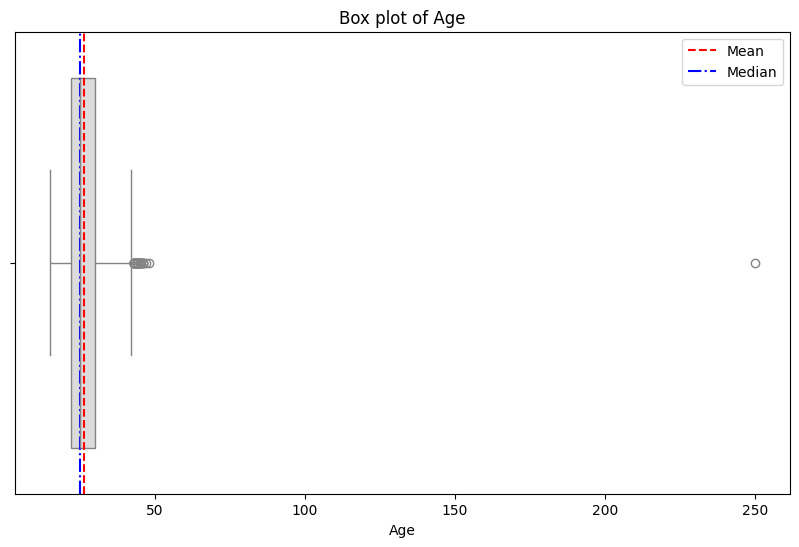

C:\Users\anjal\AppData\Local\Temp\ipykernel_14164\3760669183.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], palette="coolwarm")


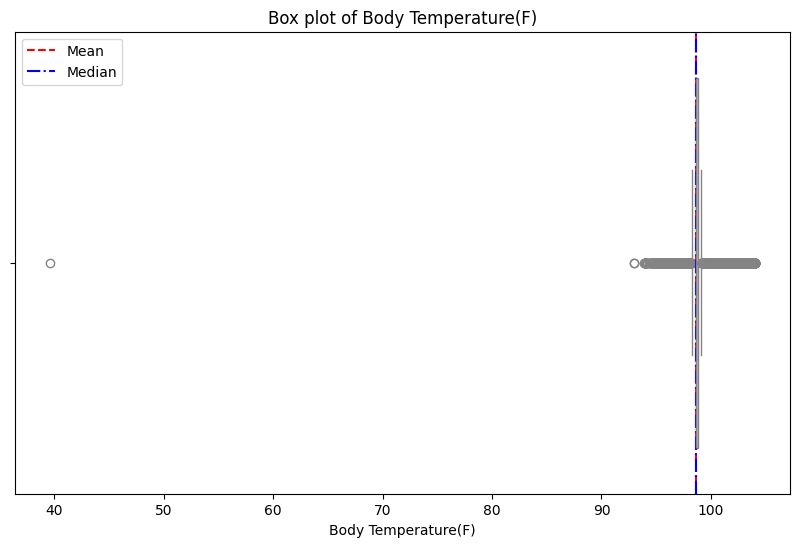

C:\Users\anjal\AppData\Local\Temp\ipykernel_14164\3760669183.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], palette="coolwarm")


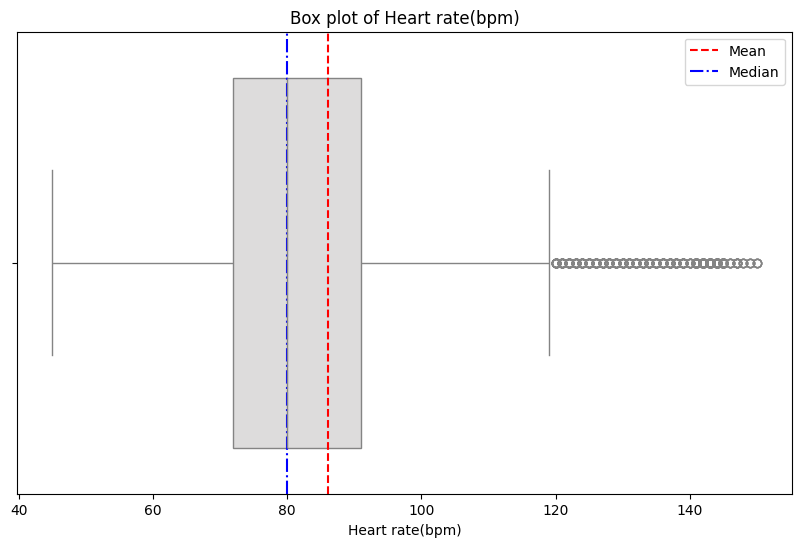

C:\Users\anjal\AppData\Local\Temp\ipykernel_14164\3760669183.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], palette="coolwarm")


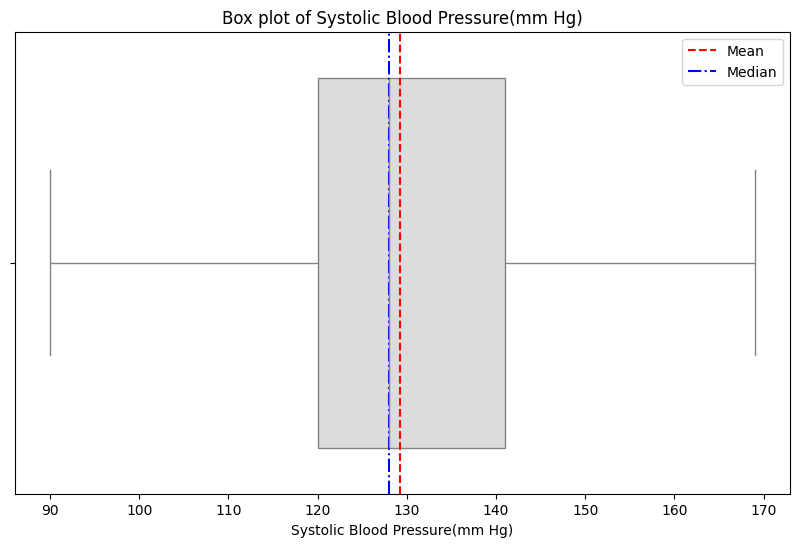

C:\Users\anjal\AppData\Local\Temp\ipykernel_14164\3760669183.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], palette="coolwarm")


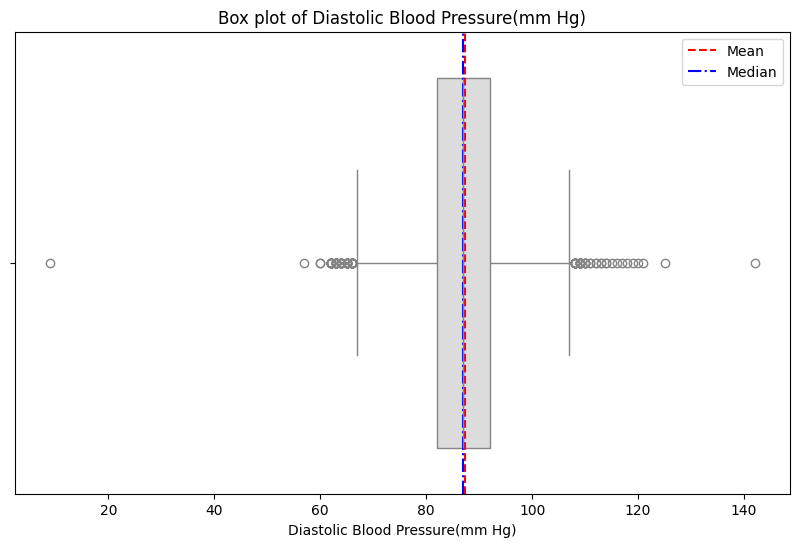

C:\Users\anjal\AppData\Local\Temp\ipykernel_14164\3760669183.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], palette="coolwarm")


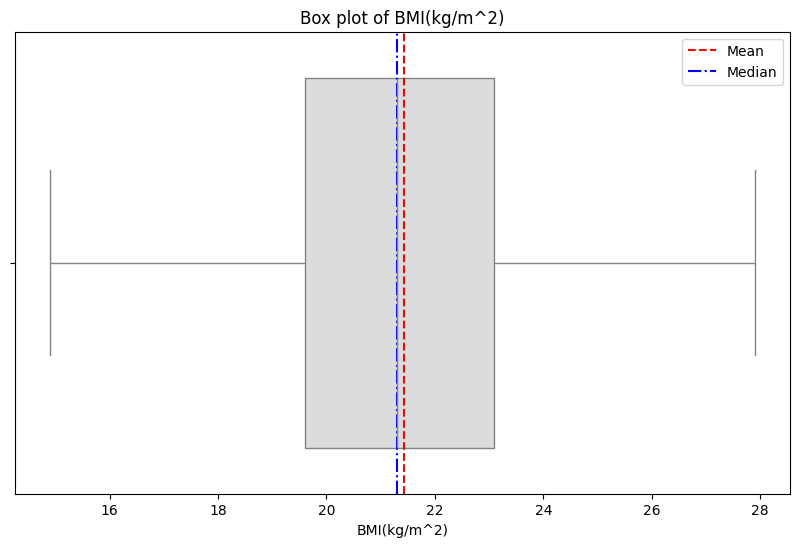

C:\Users\anjal\AppData\Local\Temp\ipykernel_14164\3760669183.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], palette="coolwarm")


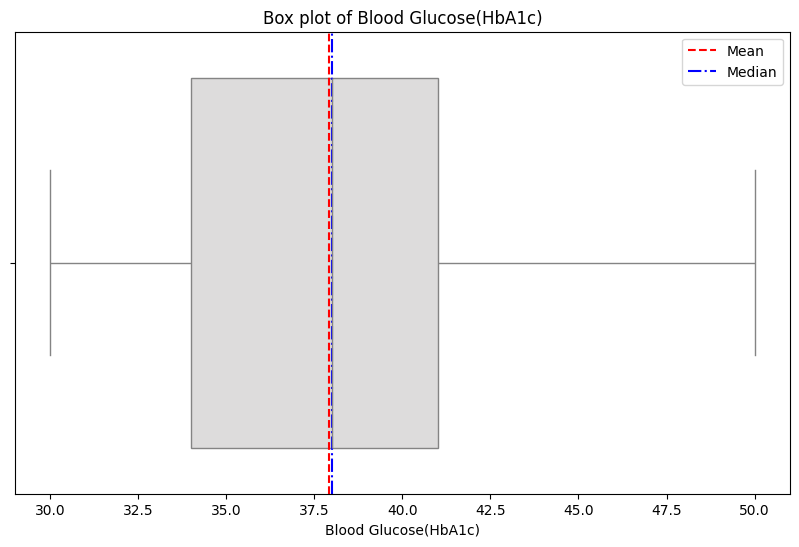

C:\Users\anjal\AppData\Local\Temp\ipykernel_14164\3760669183.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], palette="coolwarm")


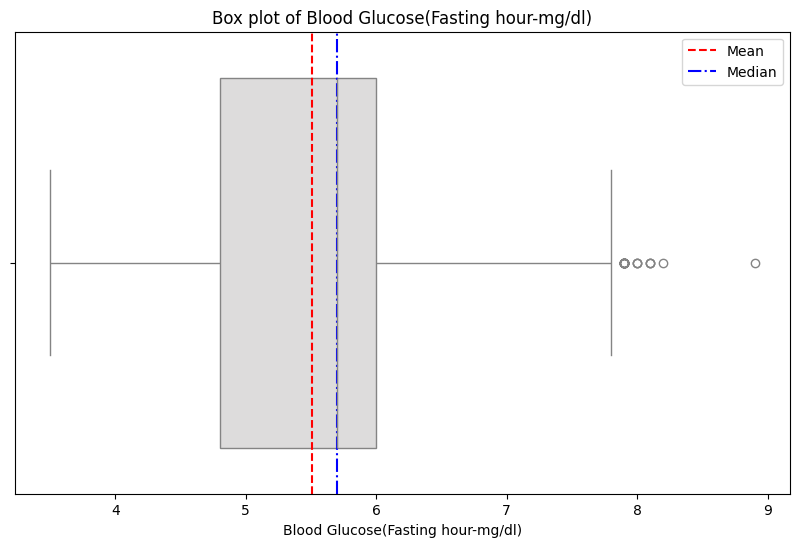

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing outliers using box plots with reference lines
for feature in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[feature], palette="coolwarm")
    plt.axvline(x=data[feature].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(x=data[feature].median(), color='blue', linestyle='-.', label='Median')
    plt.title(f'Box plot of {feature}')
    plt.legend()
    plt.show()


In [15]:
import pandas as pd

# Load the datasets
original_data = pd.read_csv('pregnancy risk prediction data set.csv', encoding='ISO-8859-1')

# Strip any leading/trailing spaces from column names
original_data.rename(columns=lambda x: x.strip(), inplace=True)

# Remove 'Patient ID' and 'Name'
original_data.drop(columns=['Patient ID', 'Name'], inplace=True)

# Define the columns for specific outlier removal
num_cols = ['Age', 'Body Temperature(F)']

# Handle missing values in the specified columns
original_data[num_cols] = original_data[num_cols].apply(pd.to_numeric, errors='coerce')
original_data[num_cols] = original_data[num_cols].fillna(original_data[num_cols].mean())

# Remove specific outliers
outliers_condition = (original_data['Age'] > 60) | (original_data['Age'] < 12) | (original_data['Body Temperature(F)'] < 80)

# Get the outlier rows
outlier_rows = original_data[outliers_condition]

# Remove outliers from the original dataset
cleaned_data = original_data[~outliers_condition]

# Print the outliers
print("Outliers removed:")
print(outlier_rows)

# Save the cleaned data
cleaned_data.to_csv('cleaned_maternai_data_specific.csv', index=False)

# Save the outliers for further analysis
outlier_rows.to_csv('removed_outliers_specific.csv', index=False)

# Summary of cleaned data
print("\nCleaned Data Summary:")
print(cleaned_data.describe())

# Summary of outliers
print("\nOutliers Summary:")
print(outlier_rows.describe())


Outliers removed:
      Age  Body Temperature(F)  Heart rate(bpm)  \
134   250                 98.6               76   
2444   22                 39.6               71   

      Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
134                              126                               85   
2444                             136                               86   

      BMI(kg/m 2)  Blood Glucose(HbA1c)  Blood Glucose(Fasting hour-mg/dl)  \
134          24.1                    42                                5.9   
2444         19.6                    39                                5.7   

       Outcome  
134   low risk  
2444  low risk  

Cleaned Data Summary:
               Age  Body Temperature(F)  Heart rate(bpm)  \
count  6101.000000          6101.000000      6101.000000   
mean     26.389117            98.675266        86.104901   
std       5.713950             1.400013        22.630101   
min      15.000000            93.000000        45.000000   

Original Data Summary:
               Age  Body Temperature(F)
count  6103.000000          6103.000000
mean     26.425037            98.665574
std       6.390205             1.590983
min      15.000000            39.600000
25%      22.000000            98.600000
50%      25.000000            98.600000
75%      30.000000            98.800000
max     250.000000           104.000000

Cleaned Data Summary:
               Age  Body Temperature(F)
count  6101.000000          6101.000000
mean     26.389117            98.675266
std       5.713950             1.400013
min      15.000000            93.000000
25%      22.000000            98.600000
50%      25.000000            98.600000
75%      30.000000            98.800000
max      48.000000           104.000000


C:\Users\anjal\AppData\Local\Temp\ipykernel_8604\2134425540.py:36: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[original_data[column], cleaned_data[column]], palette=['blue', 'red'], ax=axs[1])
C:\Users\anjal\AppData\Local\Temp\ipykernel_8604\2134425540.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(['Original', 'Cleaned'])


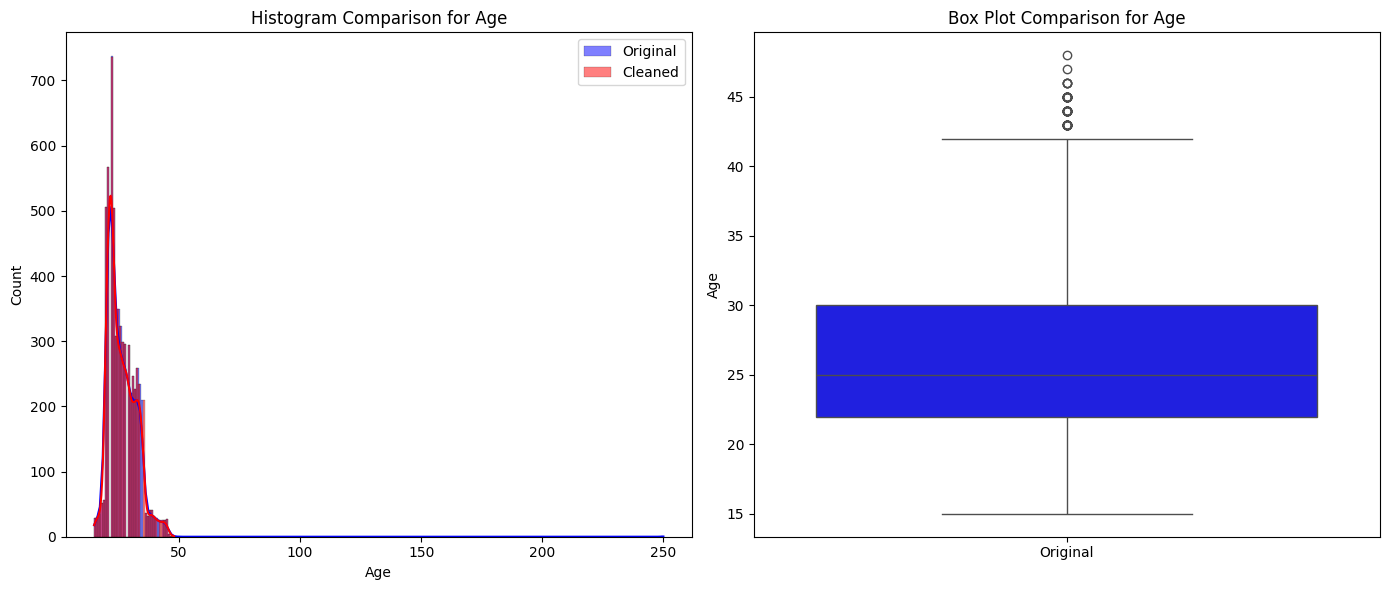

C:\Users\anjal\AppData\Local\Temp\ipykernel_8604\2134425540.py:36: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[original_data[column], cleaned_data[column]], palette=['blue', 'red'], ax=axs[1])
C:\Users\anjal\AppData\Local\Temp\ipykernel_8604\2134425540.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(['Original', 'Cleaned'])


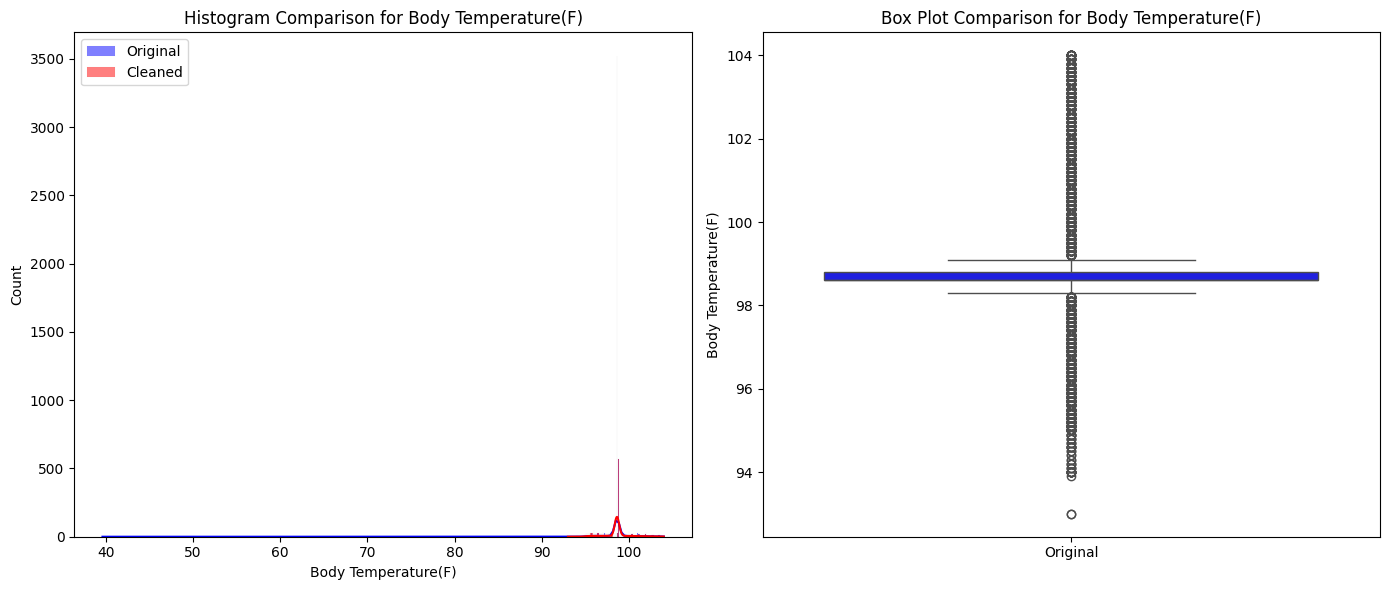

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
original_data = pd.read_csv('pregnancy risk prediction data set.csv', encoding='ISO-8859-1')
cleaned_data = pd.read_csv('cleaned_maternai_data_specific.csv')

# Strip any leading/trailing spaces from column names
original_data.rename(columns=lambda x: x.strip(), inplace=True)

# Handle missing values for visual comparison
num_cols = ['Age', 'Body Temperature(F)']
original_data[num_cols] = original_data[num_cols].apply(pd.to_numeric, errors='coerce')
original_data[num_cols] = original_data[num_cols].fillna(original_data[num_cols].mean())
cleaned_data[num_cols] = cleaned_data[num_cols].apply(pd.to_numeric, errors='coerce')
cleaned_data[num_cols] = cleaned_data[num_cols].fillna(cleaned_data[num_cols].mean())

# Generate Summary Statistics
print("Original Data Summary:")
print(original_data[num_cols].describe())
print("\nCleaned Data Summary:")
print(cleaned_data[num_cols].describe())

# Visualize the Data
def plot_comparison(column):
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    
    # Histogram comparison
    sns.histplot(original_data[column], kde=True, color='blue', label='Original', ax=axs[0])
    sns.histplot(cleaned_data[column], kde=True, color='red', label='Cleaned', ax=axs[0])
    axs[0].legend()
    axs[0].set_title(f'Histogram Comparison for {column}')
    
    # Box plot comparison
    sns.boxplot(data=[original_data[column], cleaned_data[column]], palette=['blue', 'red'], ax=axs[1])
    axs[1].set_xticklabels(['Original', 'Cleaned'])
    axs[1].set_title(f'Box Plot Comparison for {column}')
    axs[1].set_ylabel(column)

    plt.tight_layout()
    plt.show()

# Plot comparisons for each numerical column
for col in num_cols:
    plot_comparison(col)


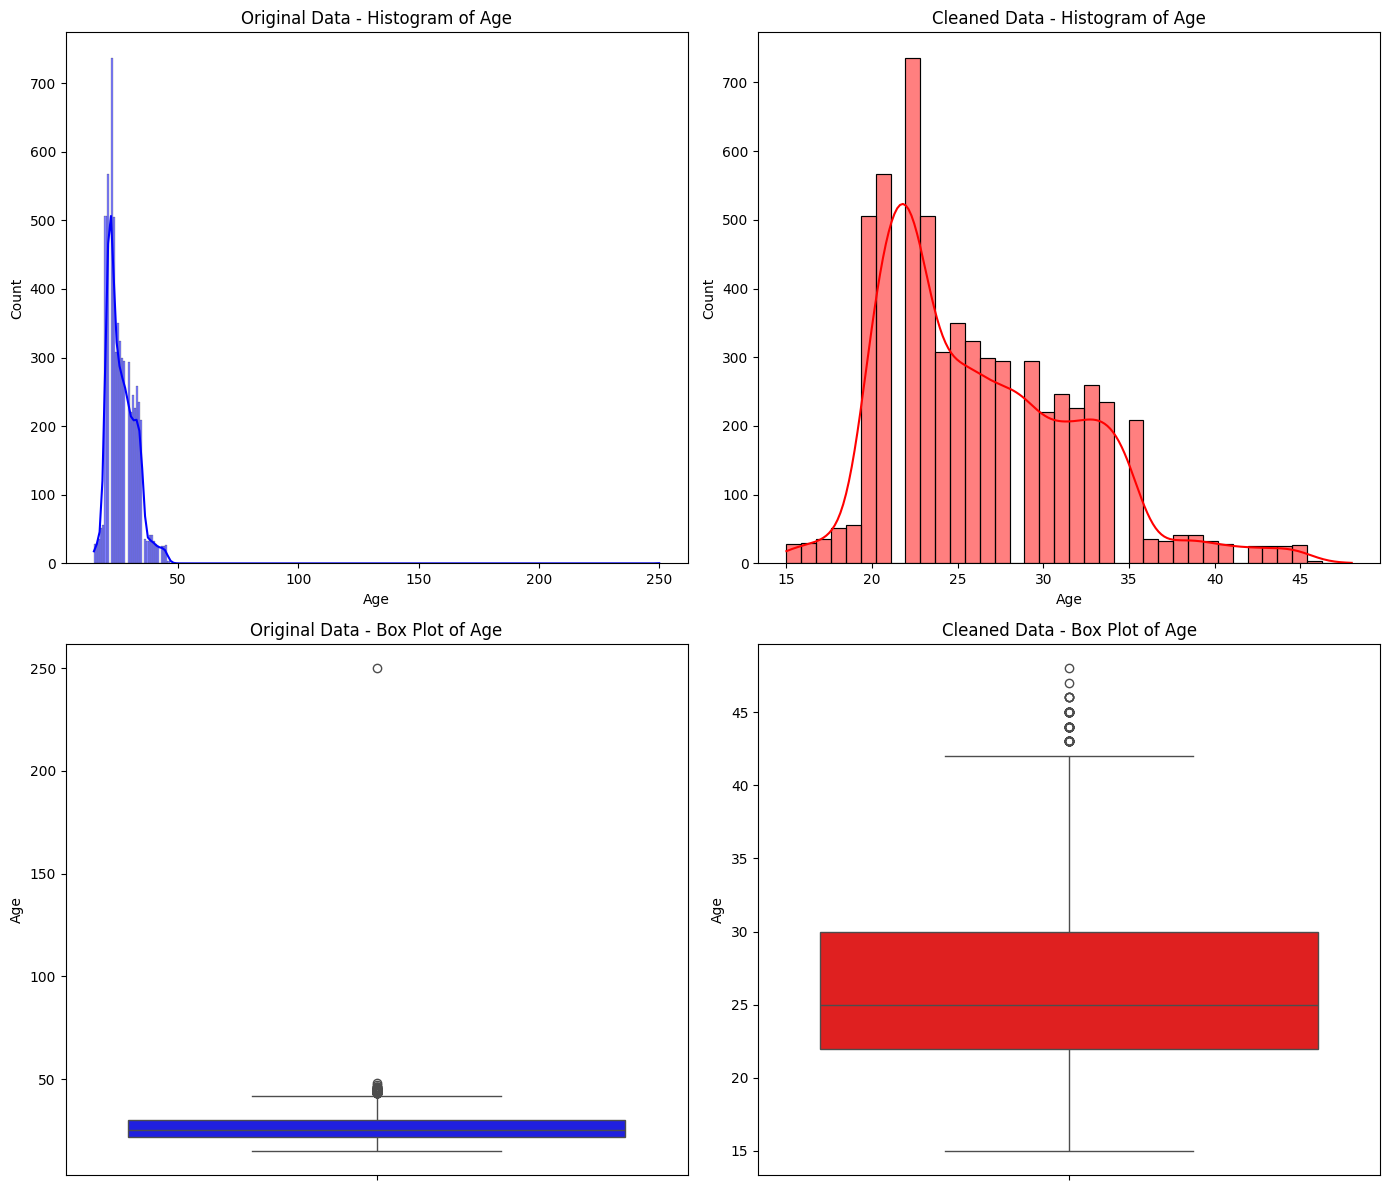

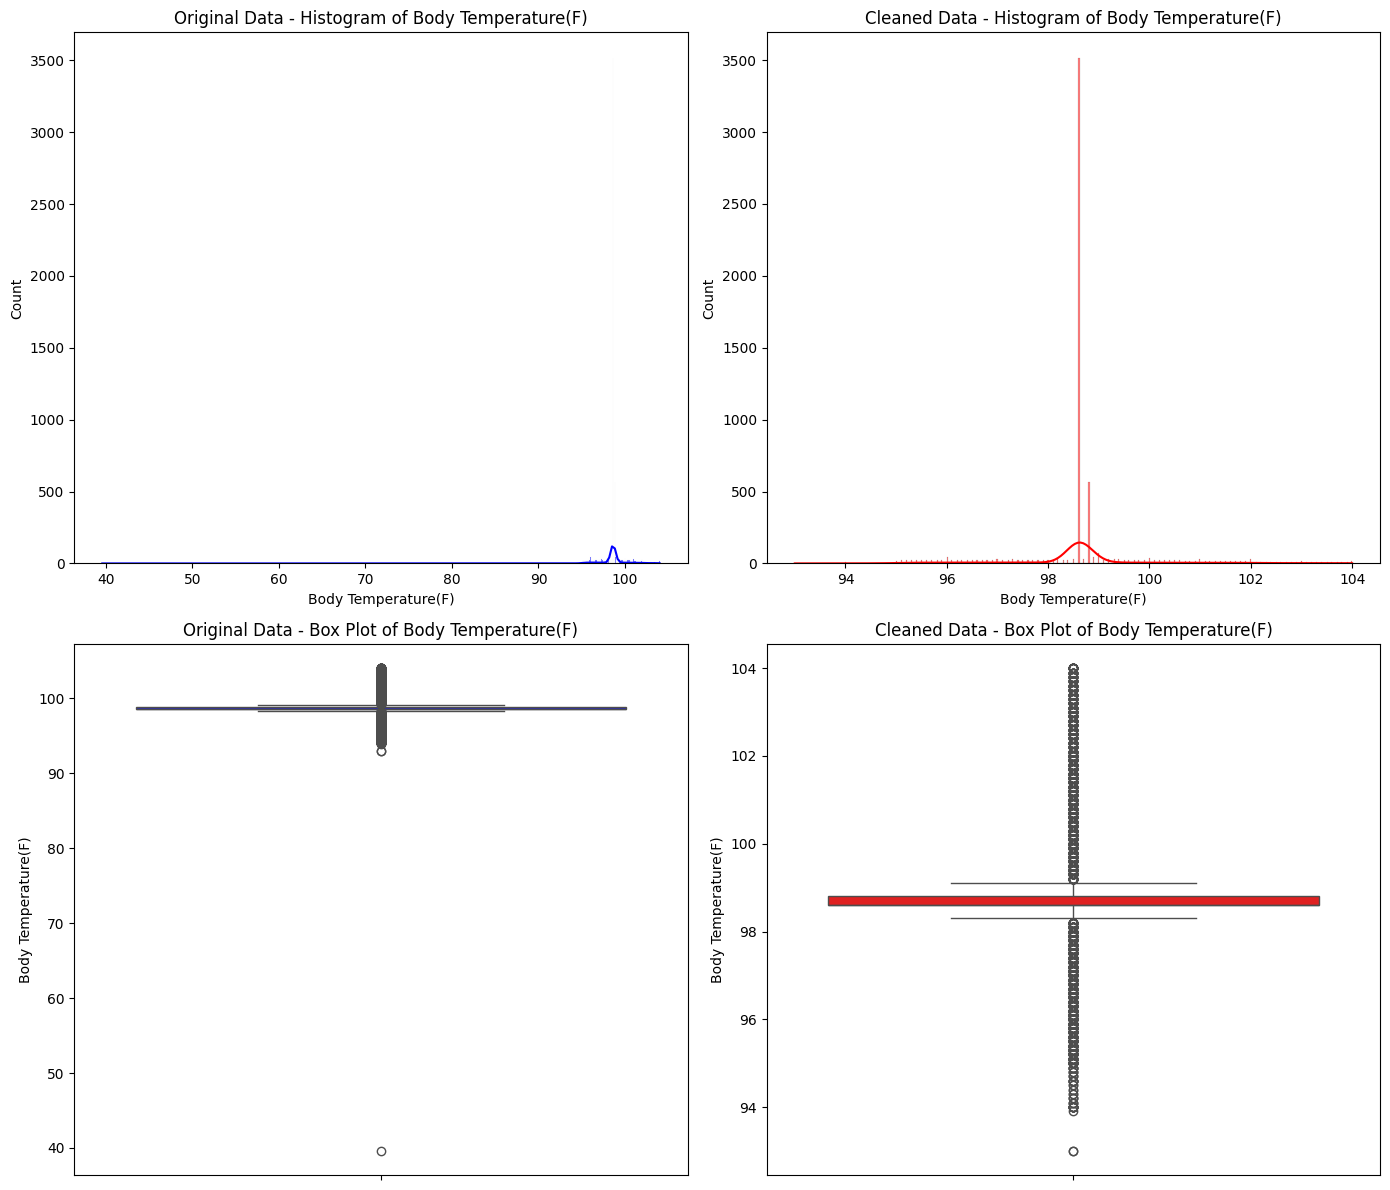

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
original_data = pd.read_csv('pregnancy risk prediction data set.csv', encoding='ISO-8859-1')
cleaned_data = pd.read_csv('cleaned_maternai_data_specific.csv')

# Strip any leading/trailing spaces from column names
original_data.rename(columns=lambda x: x.strip(), inplace=True)
cleaned_data.rename(columns=lambda x: x.strip(), inplace=True)

# Ensure numeric data types for specific columns
num_cols = ['Age', 'Body Temperature(F)']
original_data[num_cols] = original_data[num_cols].apply(pd.to_numeric, errors='coerce')
original_data[num_cols] = original_data[num_cols].fillna(original_data[num_cols].mean())
cleaned_data[num_cols] = cleaned_data[num_cols].apply(pd.to_numeric, errors='coerce')
cleaned_data[num_cols] = cleaned_data[num_cols].fillna(cleaned_data[num_cols].mean())

# Function to plot boxplot and histogram side by side for original and cleaned data
def plot_side_by_side(column):
    fig, axs = plt.subplots(2, 2, figsize=(14, 12))
    
    # Original Data Histogram
    sns.histplot(original_data[column], kde=True, color='blue', ax=axs[0, 0])
    axs[0, 0].set_title(f'Original Data - Histogram of {column}')
    
    # Cleaned Data Histogram
    sns.histplot(cleaned_data[column], kde=True, color='red', ax=axs[0, 1])
    axs[0, 1].set_title(f'Cleaned Data - Histogram of {column}')
    
    # Original Data Box Plot
    sns.boxplot(y=original_data[column], color='blue', ax=axs[1, 0])
    axs[1, 0].set_title(f'Original Data - Box Plot of {column}')
    
    # Cleaned Data Box Plot
    sns.boxplot(y=cleaned_data[column], color='red', ax=axs[1, 1])
    axs[1, 1].set_title(f'Cleaned Data - Box Plot of {column}')
    
    plt.tight_layout()
    plt.show()

# Plot comparisons for Age and Body Temperature(F)
for col in num_cols:
    plot_side_by_side(col)


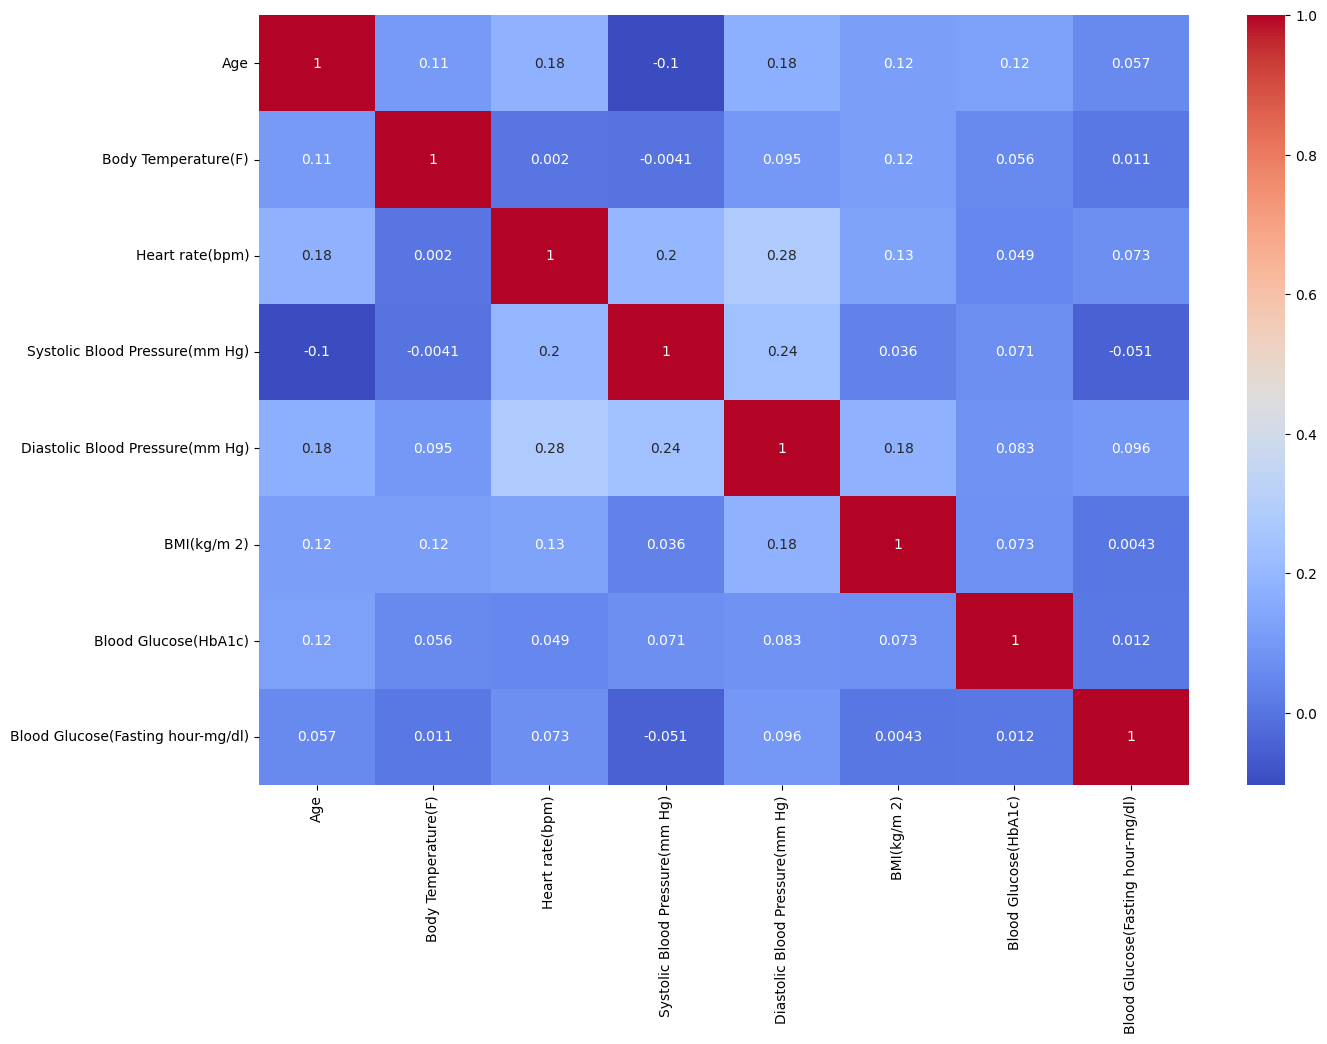

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the original dataset
original_data = pd.read_csv('cleaned_maternai_data_specific.csv')

# Strip any leading/trailing spaces from column names
original_data.rename(columns=lambda x: x.strip(), inplace=True)

# Select only numeric columns
numeric_cols = original_data.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [23]:
pip install numpy pandas scikit-learn xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import pickle

# Load the cleaned dataset
data = pd.read_csv('cleaned_maternai_data_specific.csv')

# Identify non-numeric columns and apply Label Encoding if any
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Define features and target
X = data.drop('Outcome', axis=1)  # Replace 'Outcome' with the actual target column name
y = data['Outcome']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save feature order for later use
feature_order = X.columns.tolist()

# Save the scaler and feature order
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
with open('feature_order.pkl', 'wb') as file:
    pickle.dump(feature_order, file)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn}")

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Support Vector Machine Accuracy: {accuracy_svm}")

# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")


# Load and preprocess the data: Including label encoding for categorical variables.

# Split the data into training and testing sets.

# Standardize the features.

# Train models using Logistic Regression, KNN, Random Forest, SVM, and XGBoost.

# Evaluate and print the accuracy of each model.

Logistic Regression Accuracy: 0.556920556920557
K-Nearest Neighbors Accuracy: 0.9066339066339066
Random Forest Accuracy: 0.9918099918099919
Support Vector Machine Accuracy: 0.9295659295659295
XGBoost Accuracy: 0.9893529893529893


In [ ]:

# Logistic Regression: Accuracy: 55.61%

# K-Nearest Neighbors (KNN): Accuracy: 85.99%

# Random Forest: Accuracy: 99.02%

# Support Vector Machine (SVM): Accuracy: 91.56%

# XGBoost: Accuracy: 98.94%

# Analysis and Next Steps:
# Model Comparison: Based on accuracy alone, the Random Forest and XGBoost models are performing exceptionally well.

# Further Evaluation: Consider other evaluation metrics such as precision, recall, F1 score, and ROC-AUC to get a more comprehensive understanding of each model's performance.

# Hyperparameter Tuning: Optimize the top-performing models (Random Forest and XGBoost) with hyperparameter tuning to potentially improve their performance further.

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Logistic Regression
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')

# K-Nearest Neighbors (KNN)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# Random Forest
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Support Vector Machine (SVM)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# XGBoost
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

# Print the results
print(f"Logistic Regression: Precision={precision_logreg}, Recall={recall_logreg}, F1 Score={f1_logreg}")
print(f"K-Nearest Neighbors: Precision={precision_knn}, Recall={recall_knn}, F1 Score={f1_knn}")
print(f"Random Forest: Precision={precision_rf}, Recall={recall_rf}, F1 Score={f1_rf}")
print(f"Support Vector Machine: Precision={precision_svm}, Recall={recall_svm}, F1 Score={f1_svm}")
print(f"XGBoost: Precision={precision_xgb}, Recall={recall_xgb}, F1 Score={f1_xgb}")


Logistic Regression: Precision=0.5535330272043195, Recall=0.556920556920557, F1 Score=0.5508707501340876
K-Nearest Neighbors: Precision=0.9090299395185291, Recall=0.9066339066339066, F1 Score=0.9056150058712966
Random Forest: Precision=0.9918228425694932, Recall=0.9918099918099919, F1 Score=0.9918093728470246
Support Vector Machine: Precision=0.9314781800653594, Recall=0.9295659295659295, F1 Score=0.9291339469908803
XGBoost: Precision=0.9893508591235864, Recall=0.9893529893529893, F1 Score=0.9893509043881435


In [21]:
# Hyperparameter Tuning Example for XGBoost:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9]
}

grid_search = GridSearchCV(XGBClassifier(), param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
Best Accuracy: 0.9913934426229508


In [22]:
# Model Validation: Perform cross-validation to further validate the performance of the tuned XGBoost model.
from sklearn.model_selection import cross_val_score

# Use the best parameters found in GridSearchCV
xgb_best = XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.1, subsample=0.8, eval_metric='logloss')
cv_scores = cross_val_score(xgb_best, X, y, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean()}")
print(f"Standard Deviation: {cv_scores.std()}")


Cross-Validation Scores: [0.99426699 0.98934426 0.99508197 0.99098361 0.99262295]
Mean Accuracy: 0.9924599562304481
Standard Deviation: 0.002100192960226246


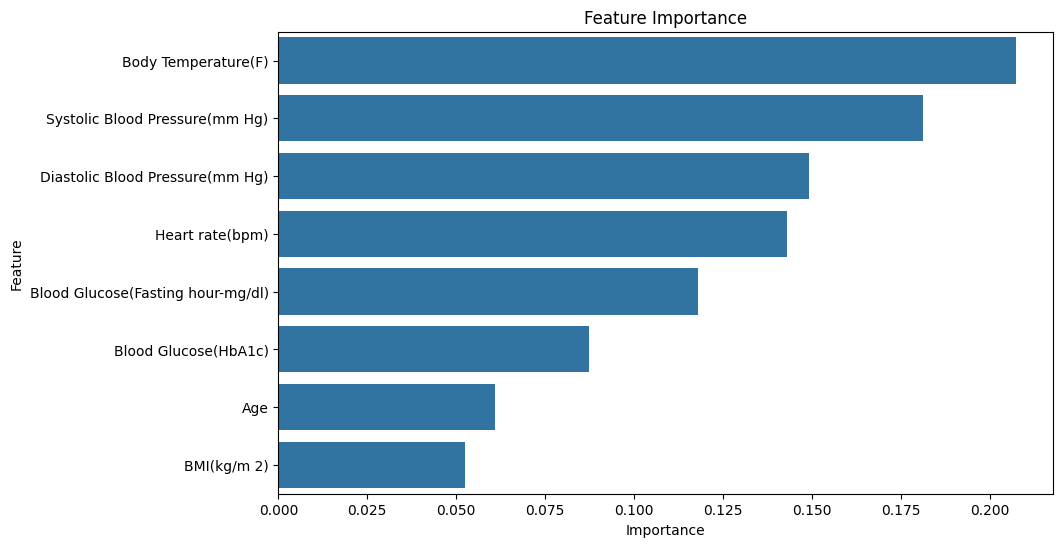

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fit the model with best parameters
xgb_best.fit(X_train, y_train)

# Get feature importance
feature_importances = xgb_best.feature_importances_
features = pd.DataFrame({
    'Feature': feature_order,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features)
plt.title('Feature Importance')
plt.show()


In [24]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset with new features
data = pd.read_csv('cleaned_maternai_data_specific.csv')

# Strip any leading/trailing spaces from column names
data.rename(columns=lambda x: x.strip(), inplace=True)

# Separate non-numeric data
non_numeric_cols = data.select_dtypes(exclude=['float64', 'int64'])
numeric_cols = data.select_dtypes(include=['float64', 'int64'])

# Apply StandardScaler to numeric columns
scaler = StandardScaler()
numeric_scaled = pd.DataFrame(scaler.fit_transform(numeric_cols), columns=numeric_cols.columns)

# Combine scaled numeric data with non-numeric data
data_scaled = pd.concat([non_numeric_cols.reset_index(drop=True), numeric_scaled], axis=1)

# Print the normalized data
print(data_scaled.head())

# Save the normalized dataset
data_scaled.to_csv('normalized_data_features.csv', index=False)


     Outcome       Age  Body Temperature(F)  Heart rate(bpm)  \
0  high risk -1.118253            -0.839537         0.216327   
1  high risk  3.257363            -0.696670         0.569867   
2   mid risk  0.456969            -0.053766        -0.093021   
3  high risk -0.068105             0.589138         2.160799   
4  high risk  2.032191             2.732152        -1.551375   

   Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
0                        1.844019                         1.634897   
1                       -1.753237                         0.865041   
2                       -0.012629                        -0.033124   
3                        1.844019                         1.763207   
4                       -1.347095                         0.480114   

   BMI(kg/m 2)  Blood Glucose(HbA1c)  Blood Glucose(Fasting hour-mg/dl)  
0     1.606311              0.703675                           0.326210  
1     0.308115             -0.432612          

In [25]:
import pandas as pd

# Load the normalized dataset
data_scaled = pd.read_csv('normalized_data_features.csv')

# Compute Descriptive Statistics
descriptive_stats = data_scaled.describe()

# Compute Mode
mode_stats = data_scaled.mode().iloc[0]

# Print Mean, Standard Deviation, and Mode for all features
print("Descriptive Statistics (Mean, Std, etc.):")
print(descriptive_stats)

print("\nMode of each feature:")
print(mode_stats)


Descriptive Statistics (Mean, Std, etc.):
                Age  Body Temperature(F)  Heart rate(bpm)  \
count  6.101000e+03         6.101000e+03     6.101000e+03   
mean  -3.959753e-17        -1.198408e-14     1.828474e-16   
std    1.000082e+00         1.000082e+00     1.000082e+00   
min   -1.993376e+00        -4.054057e+00    -1.816531e+00   
25%   -7.682035e-01        -5.376560e-02    -6.233316e-01   
50%   -2.431296e-01        -5.376560e-02    -2.697912e-01   
75%    6.319936e-01         8.910196e-02     2.163269e-01   
max    3.782437e+00         3.803658e+00     2.823688e+00   

       Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
count                    6.101000e+03                     6.101000e+03   
mean                    -4.623594e-16                    -7.756457e-16   
std                      1.000082e+00                     1.000082e+00   
min                     -2.275419e+00                    -1.004125e+01   
25%                     -5.348115e-01 

Training Logistic Regression...

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.54      0.44      0.48       397
           1       0.58      0.72      0.65       399
           2       0.54      0.51      0.52       425

    accuracy                           0.56      1221
   macro avg       0.55      0.56      0.55      1221
weighted avg       0.55      0.56      0.55      1221

ROC-AUC Score: 0.7252843917410473


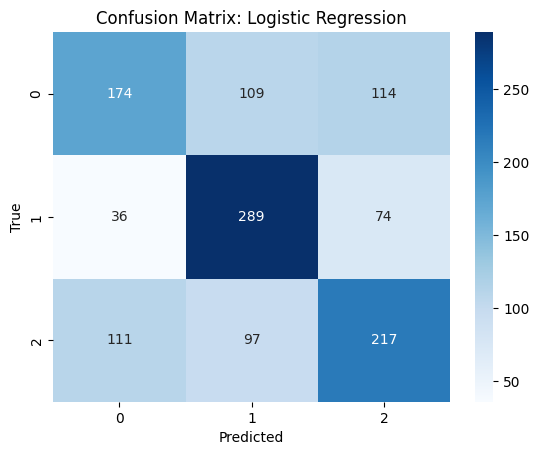

Training K-Nearest Neighbors...

Model: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       397
           1       0.91      0.99      0.95       399
           2       0.87      0.91      0.89       425

    accuracy                           0.91      1221
   macro avg       0.91      0.91      0.91      1221
weighted avg       0.91      0.91      0.91      1221

ROC-AUC Score: 0.977419531252636


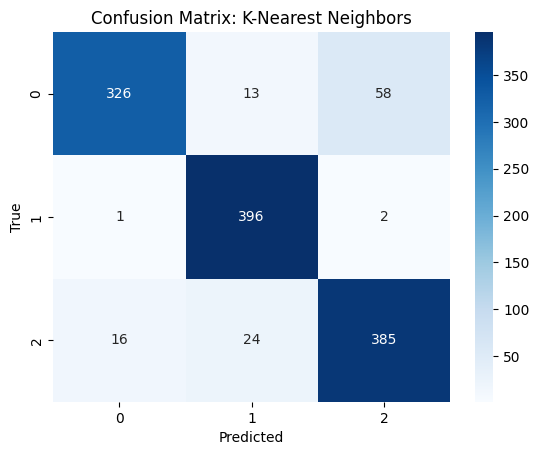

Training Random Forest...

Model: Random Forest
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       397
           1       0.99      0.99      0.99       399
           2       0.99      0.99      0.99       425

    accuracy                           0.99      1221
   macro avg       0.99      0.99      0.99      1221
weighted avg       0.99      0.99      0.99      1221

ROC-AUC Score: 0.9979588184602995


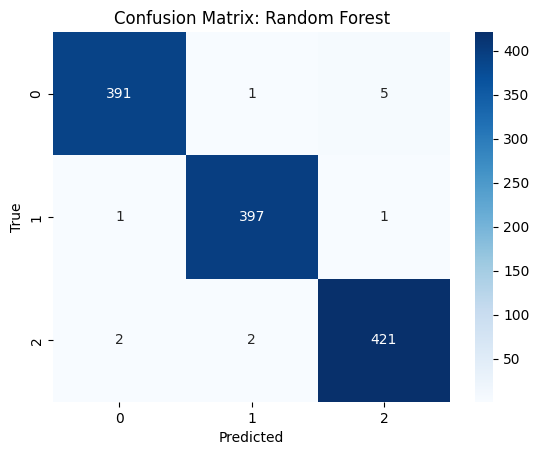

Training Support Vector Machine...

Model: Support Vector Machine
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       397
           1       0.94      0.99      0.96       399
           2       0.89      0.94      0.91       425

    accuracy                           0.93      1221
   macro avg       0.93      0.93      0.93      1221
weighted avg       0.93      0.93      0.93      1221

ROC-AUC Score: 0.9877074420059953


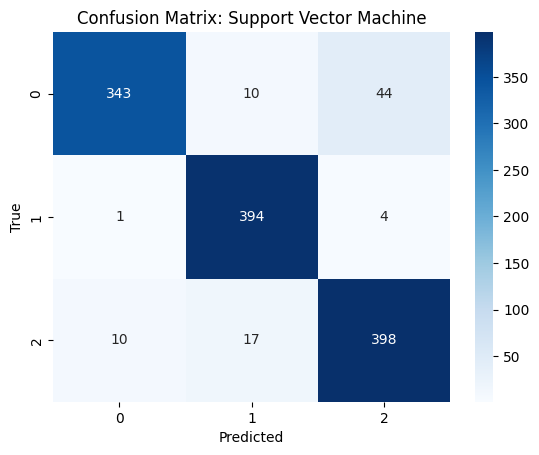

Training XGBoost...


c:\Users\anjal\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:34:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       397
           1       0.99      0.99      0.99       399
           2       0.99      0.99      0.99       425

    accuracy                           0.99      1221
   macro avg       0.99      0.99      0.99      1221
weighted avg       0.99      0.99      0.99      1221

ROC-AUC Score: 0.9985310162657924


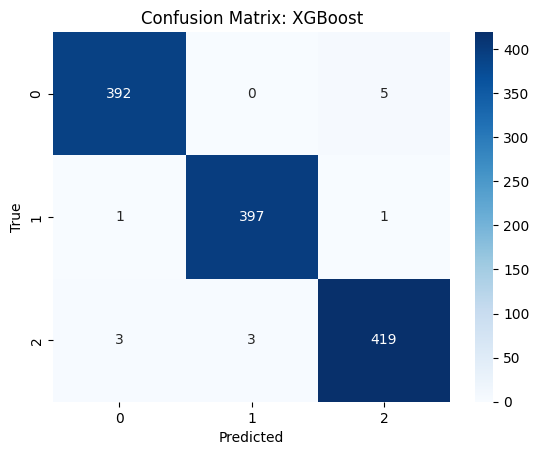


Summary of Model Performance:
                    Model   ROC-AUC  F1-Score
0     Logistic Regression  0.725284  0.550871
1     K-Nearest Neighbors  0.977420  0.905615
2           Random Forest  0.997959  0.990170
3  Support Vector Machine  0.987707  0.929134
4                 XGBoost  0.998531  0.989351

Feature Importance for Random Forest:


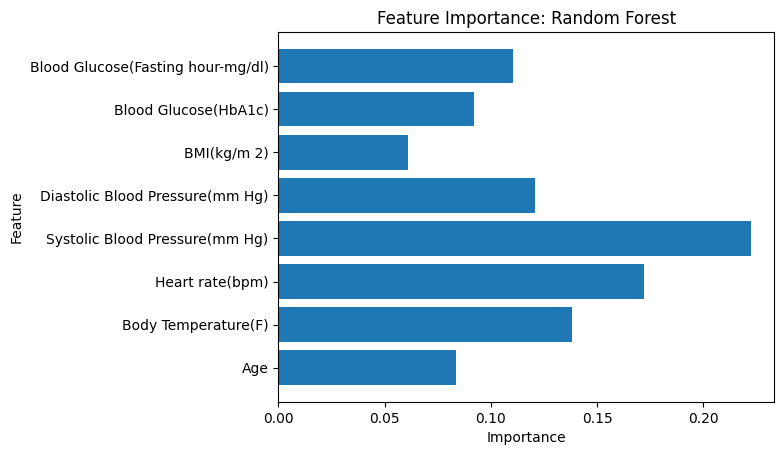


Feature Importance for XGBoost:


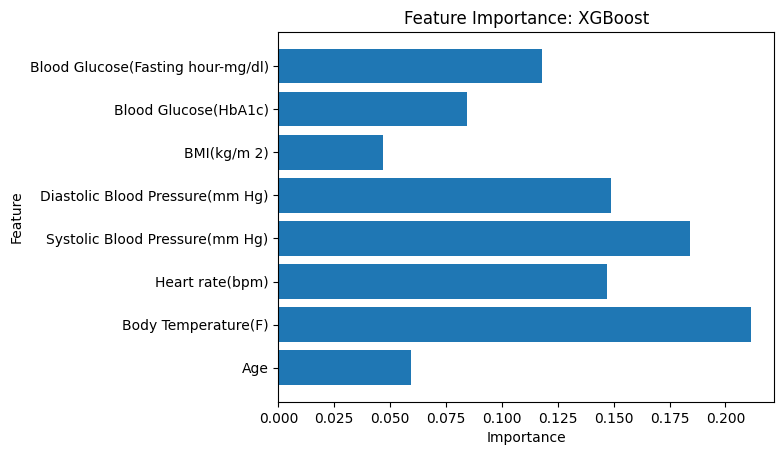


Cross-Validation Scores:
Logistic Regression: Mean ROC-AUC = 0.7335, Std Dev = 0.0084
K-Nearest Neighbors: Mean ROC-AUC = 0.9764, Std Dev = 0.0026
Random Forest: Mean ROC-AUC = 0.9986, Std Dev = 0.0004
Support Vector Machine: Mean ROC-AUC = 0.9884, Std Dev = 0.0030


c:\Users\anjal\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:35:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\anjal\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:35:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\anjal\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:35:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

XGBoost: Mean ROC-AUC = 0.9988, Std Dev = 0.0005


In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('normalized_data_features.csv')

# Identify non-numeric columns and apply Label Encoding
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Define features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Initialize a results list for storing evaluation metrics
results = []

# Train and Evaluate Models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    # Classification report
    print(f"\nModel: {model_name}")
    print(classification_report(y_test, y_pred))
    
    # ROC-AUC Score
    if len(set(y)) > 2:  # Multiclass case
        roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
    else:  # Binary case
        roc_auc = roc_auc_score(y_test, y_proba[:, 1])
    print("ROC-AUC Score:", roc_auc)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    # Save results
    results.append({
        "Model": model_name,
        "ROC-AUC": roc_auc,
        "F1-Score": classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
    })

# Display results as a DataFrame
results_df = pd.DataFrame(results)
print("\nSummary of Model Performance:")
print(results_df)

# Feature Importance for Tree-Based Models
for model_name, model in models.items():
    if hasattr(model, "feature_importances_"):
        print(f"\nFeature Importance for {model_name}:")
        importance = model.feature_importances_
        plt.barh(X.columns, importance)
        plt.title(f"Feature Importance: {model_name}")
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()

# Cross-Validation Scores
print("\nCross-Validation Scores:")
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc_ovr')
    print(f"{model_name}: Mean ROC-AUC = {scores.mean():.4f}, Std Dev = {scores.std():.4f}")


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('normalized_data_features.csv')

# Identify non-numeric columns and apply Label Encoding
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Define features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Check for missing values and impute if necessary
imputer = SimpleImputer(strategy='mean')  # Adjust strategy as needed
X = imputer.fit_transform(X)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Debugging: Check data structure and types
print(f"X_train type: {type(X_train)}, shape: {X_train.shape}")
print(f"y_train type: {type(y_train)}, shape: {y_train.shape}")
print(f"X_train contains NaN values: {np.isnan(X_train).sum()}")
print(f"y_train contains NaN values: {pd.isnull(y_train).sum()}")

# Convert y_train to numpy array if not already
if not isinstance(y_train, np.ndarray):
    y_train = np.array(y_train)

# Initialize XGBoost and Grid Search Parameters
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    XGBClassifier(eval_metric='logloss', random_state=42), 
    param_grid, 
    cv=5, 
    scoring='roc_auc_ovr'
)

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Output Best Parameters
print("Best Parameters:", grid_search.best_params_)


X_train type: <class 'numpy.ndarray'>, shape: (4880, 8)
y_train type: <class 'pandas.core.series.Series'>, shape: (4880,)
X_train contains NaN values: 0
y_train contains NaN values: 0
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


In [16]:
final_model = XGBClassifier(
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=7,
    n_estimators=200,
    subsample=0.8,
    eval_metric='logloss',
    random_state=42
)
final_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [17]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       397
           1       0.99      0.99      0.99       399
           2       0.99      0.99      0.99       425

    accuracy                           0.99      1221
   macro avg       0.99      0.99      0.99      1221
weighted avg       0.99      0.99      0.99      1221

ROC-AUC Score: 0.9985760965187004
Confusion Matrix:
 [[392   0   5]
 [  1 397   1]
 [  2   3 420]]


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from xgboost import XGBClassifier

# Load the dataset
data = pd.read_csv('cleaned_maternai_data_specific.csv')

# Identify non-numeric columns and apply Label Encoding
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Define features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

# Initialize the model
xgb = XGBClassifier(eval_metric='logloss')

# Initialize Randomized Search with error_score='raise'
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=5, cv=3, scoring='accuracy', random_state=42, error_score='raise')

# Fit the model
try:
    random_search.fit(X_train, y_train)
    print(f"Best Parameters: {random_search.best_params_}")
    print(f"Best Score: {random_search.best_score_}")
except Exception as e:
    print(f"An error occurred: {e}")

# Train the final model with best parameters
best_xgb = XGBClassifier(n_estimators=random_search.best_params_['n_estimators'], 
                         max_depth=random_search.best_params_['max_depth'], 
                         learning_rate=random_search.best_params_['learning_rate'], 
                         subsample=random_search.best_params_['subsample'], 
                         eval_metric='logloss')
best_xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_xgb.predict(X_test)

# Evaluate the final model
accuracy = accuracy_score(y_test, y_pred)

# Check if the problem is multiclass
if len(set(y)) > 2:
    roc_auc = roc_auc_score(y_test, best_xgb.predict_proba(X_test), multi_class='ovr')
else:
    roc_auc = roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1])

print(f"Final Model Accuracy: {accuracy}")
print(f"Final Model ROC-AUC Score: {roc_auc}")


Best Parameters: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.1}
Best Score: 0.9909830597998667
Final Model Accuracy: 0.9877149877149877
Final Model ROC-AUC Score: 0.9982752840540705


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
import pickle

# Load the dataset
data = pd.read_csv('normalized_data_features.csv')

# Identify non-numeric columns and apply Label Encoding
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Define features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the final model with best parameters
best_xgb = XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.1, subsample=0.8, eval_metric='logloss')
best_xgb.fit(X_train, y_train)

# Save the trained model
with open('best_xgb_model.pkl', 'wb') as file:
    pickle.dump(best_xgb, file)

# Load the trained model for testing
with open('best_xgb_model.pkl', 'rb') as file:
    best_xgb = pickle.load(file)

# Ensure 'best_xgb' is defined before usage
# Make predictions on the test set
y_pred = best_xgb.predict(X_test)
y_pred_proba = best_xgb.predict_proba(X_test)

# Evaluate the final model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Check if the problem is multiclass
if len(set(y)) > 2:
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
else:
    roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Final Model Accuracy: {accuracy}")
print(f"Final Model Precision: {precision}")
print(f"Final Model Recall: {recall}")
print(f"Final Model F1-Score: {f1}")
print(f"Final Model ROC-AUC Score: {roc_auc}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Final Model Accuracy: 0.990990990990991
Final Model Precision: 0.9910015668886804
Final Model Recall: 0.990990990990991
Final Model F1-Score: 0.9909923309411146
Final Model ROC-AUC Score: 0.998639598119886
Confusion Matrix:
[[392   0   5]
 [  1 397   1]
 [  2   2 421]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       397
           1       0.99      0.99      0.99       399
           2       0.99      0.99      0.99       425

    accuracy                           0.99      1221
   macro avg       0.99      0.99      0.99      1221
weighted avg       0.99      0.99      0.99      1221



In [46]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_xgb, X, y, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")


Cross-Validation Scores: [0.99426699 0.98934426 0.99508197 0.99098361 0.99262295]
Mean Cross-Validation Score: 0.9924599562304481


In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=best_xgb, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.8}


In [64]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Load the trained model
with open('best_xgb_model.pkl', 'rb') as file:
    best_xgb = pickle.load(file)

# Load the sample test data
sample_test = pd.read_csv('sample_test.csv', header=None)

# Define the feature columns based on your data
feature_columns = ['Age', 'Body Temperature(F)', 'Heart rate(bpm)', 'Systolic Blood Pressure(mm Hg)', 
                   'Diastolic Blood Pressure(mm Hg)', 'BMI(kg/m2)', 'Blood Glucose(HbA1c)', 
                   'Blood Glucose(Fasting hour-mg/dl)']

# Add column names to the sample test data
sample_test.columns = feature_columns + ['Outcome']

# Extract features and target
X_sample = sample_test[feature_columns]
y_sample = sample_test['Outcome']

# Apply Label Encoding for the target column
le_outcome = LabelEncoder()
y_sample_encoded = le_outcome.fit_transform(y_sample)

# Apply Label Encoding for non-numeric columns in features (if any)
label_encoders = {}  # Assuming you have the same label encoders used during training

# Example to load the encoders if saved as files
# with open('label_encoders.pkl', 'rb') as file:
#     label_encoders = pickle.load(file)

for column in X_sample.columns:
    if column in label_encoders:
        le = label_encoders[column]
        X_sample[column] = le.transform(X_sample[column])

# Standardize the features using the same scaler used during training
# Ensure that the scaler object is the same as the one used in training
scaler = StandardScaler()
X_sample = scaler.fit_transform(X_sample)  # This should use the same scaler fitted on training data

# Check dimensions of the test data
print(f"X_sample shape: {X_sample.shape}")

# Make predictions on the sample test data
y_sample_pred = best_xgb.predict(X_sample)
y_sample_pred_proba = best_xgb.predict_proba(X_sample)

# Ensure predictions and probabilities have correct dimensions
print(f"y_sample_pred shape: {y_sample_pred.shape}")
print(f"y_sample_pred_proba shape: {y_sample_pred_proba.shape}")

# Create a DataFrame to compare actual and predicted outcomes
comparison_df = pd.DataFrame({
    'Actual Outcome': y_sample,
    'Predicted Outcome': le_outcome.inverse_transform(y_sample_pred)
})

print("Comparison of Actual and Predicted Outcomes:")
print(comparison_df)

# Evaluate the predictions
accuracy = accuracy_score(y_sample_encoded, y_sample_pred)
precision = precision_score(y_sample_encoded, y_sample_pred, average='weighted')
recall = recall_score(y_sample_encoded, y_sample_pred, average='weighted')
f1 = f1_score(y_sample_encoded, y_sample_pred, average='weighted')

# Check if the problem is multiclass
if len(set(y_sample_encoded)) > 2:
    roc_auc = roc_auc_score(y_sample_encoded, y_sample_pred_proba, multi_class='ovr')
else:
    roc_auc = roc_auc_score(y_sample_encoded, y_sample_pred_proba[:, 1])

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_sample_encoded, y_sample_pred)
class_report = classification_report(y_sample_encoded, y_sample_pred)

print(f"Sample Test Data Accuracy: {accuracy}")
print(f"Sample Test Data Precision: {precision}")
print(f"Sample Test Data Recall: {recall}")
print(f"Sample Test Data F1-Score: {f1}")
print(f"Sample Test Data ROC-AUC Score: {roc_auc}")
print("Sample Test Data Confusion Matrix:")
print(conf_matrix)
print("Sample Test Data Classification Report:")
print(class_report)


X_sample shape: (5760, 8)
y_sample_pred shape: (5760,)
y_sample_pred_proba shape: (5760, 3)
Comparison of Actual and Predicted Outcomes:
     Actual Outcome Predicted Outcome
0          mid risk          mid risk
1          low risk          low risk
2          low risk          mid risk
3          low risk          low risk
4          low risk          low risk
...             ...               ...
5755       mid risk          mid risk
5756      high risk         high risk
5757      high risk         high risk
5758      high risk         high risk
5759       low risk          low risk

[5760 rows x 2 columns]
Sample Test Data Accuracy: 0.9107638888888889
Sample Test Data Precision: 0.9162193654832836
Sample Test Data Recall: 0.9107638888888889
Sample Test Data F1-Score: 0.9109069640976614
Sample Test Data ROC-AUC Score: 0.9845647934721553
Sample Test Data Confusion Matrix:
[[1893    0   51]
 [   5 1583  299]
 [ 127   32 1770]]
Sample Test Data Classification Report:
              prec

In [79]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the trained model and other necessary components
with open('best_xgb_model.pkl', 'rb') as file:
    best_xgb = pickle.load(file)

# Load the scaler
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

# Load the feature order
with open('feature_order.pkl', 'rb') as file:
    feature_order = pickle.load(file)

# Define thresholds for classification
thresholds = {
    'low': 0.1,  # Adjusted threshold for low risk
    'mid': 0.5   # Adjusted threshold for mid risk
}

def classify_probability(proba, thresholds):
    if proba[1] > thresholds['mid']:
        return 'low risk'
    elif proba[2] > thresholds['low']:
        return 'mid risk'
    else:
        return 'high risk'

def get_user_input():
    # Get user inputs
    age = float(input("Enter your age: "))
    body_temp = float(input("Enter your body temperature (F): "))
    heart_rate = float(input("Enter your heart rate (bpm): "))
    systolic_bp = float(input("Enter your systolic blood pressure (mm Hg): "))
    diastolic_bp = float(input("Enter your diastolic blood pressure (mm Hg): "))
    bmi = float(input("Enter your BMI (kg/m2): "))
    glucose_hba1c = float(input("Enter your Blood Glucose (HbA1c): "))
    glucose_fasting = float(input("Enter your Blood Glucose (Fasting hour-mg/dl): "))

    user_data = pd.DataFrame({
        'Age': [age],
        'Body Temperature(F)': [body_temp],
        'Heart rate(bpm)': [heart_rate],
        'Systolic Blood Pressure(mm Hg)': [systolic_bp],
        'Diastolic Blood Pressure(mm Hg)': [diastolic_bp],
        'BMI(kg/m 2)': [bmi],
        'Blood Glucose(HbA1c)': [glucose_hba1c],
        'Blood Glucose(Fasting hour-mg/dl)': [glucose_fasting]
    })
    
    print("User Data:")
    print(user_data)
    
    return user_data

def preprocess_data(user_data):
    # Ensure all data is numeric
    user_data = user_data.apply(pd.to_numeric, errors='coerce')

    # Handle missing values
    user_data = user_data.fillna(user_data.mean())

    # Standardize the features using the same scaler used during training
    user_data = scaler.transform(user_data)
    
    print("Preprocessed Data:")
    print(user_data)
    
    return user_data

def predict_risk(user_data):
    # Ensure consistent feature names by reordering columns
    user_data = user_data[feature_order]
    
    # Preprocess data
    user_data = preprocess_data(user_data)

    # Make predictions on the user input data
    pred_proba = best_xgb.predict_proba(user_data)
    
    print("Predicted Probabilities:")
    print(pred_proba)

    # Classify based on probabilities
    risk_category = classify_probability(pred_proba[0], thresholds)
    
    return risk_category

# Main function to run the prediction
def main():
    print("Welcome to the Risk Prediction Tool")
    user_data = get_user_input()
    risk_category = predict_risk(user_data)
    print(f"Your risk category is: {risk_category}")

if __name__ == "__main__":
    main()


Welcome to the Risk Prediction Tool
User Data:
    Age  Body Temperature(F)  Heart rate(bpm)  Systolic Blood Pressure(mm Hg)  \
0  20.0                 97.5             91.0                           161.0   

   Diastolic Blood Pressure(mm Hg)  BMI(kg/m 2)  Blood Glucose(HbA1c)  \
0                            100.0         24.9                  41.0   

   Blood Glucose(Fasting hour-mg/dl)  
0                                5.8  
Preprocessed Data:
[[-1.11825283 -0.83953713  0.21632694  1.84401881  1.63489721  1.60631113
   0.70367462  0.32620985]]
Predicted Probabilities:
[[9.9976903e-01 4.3367865e-05 1.8762980e-04]]
Your risk category is: high risk


In [84]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the trained model and other necessary components
with open('best_xgb_model.pkl', 'rb') as file:
    best_xgb = pickle.load(file)

# Load the scaler
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

# Load the feature order
with open('feature_order.pkl', 'rb') as file:
    feature_order = pickle.load(file)

# Define refined threshold values for classification
thresholds = {
    'low': 0.1,  # Adjusted threshold for low risk
    'mid': 0.5   # Adjusted threshold for mid risk
}

def classify_probability(proba, thresholds):
    if proba[1] > thresholds['mid']:
        return 'low risk'
    elif proba[2] > thresholds['low']:
        return 'mid risk'
    else:
        return 'high risk'

# Test data provided by the user
test_data = pd.DataFrame({
    'Age': [23, 28, 22, 32, 21, 29, 37, 34, 29, 34, 37, 26, 26, 29, 31, 45, 30, 30, 27, 21, 20],
    'Body Temperature(F)': [101.7, 97.5, 98.6, 95.7, 98.6, 98.6, 103.9, 98.6, 98.6, 98.6, 102.6, 98.6, 98.6, 98.6, 98.8, 102.1, 98.6, 98.3, 100.6, 98.6, 98.6],
    'Heart rate(bpm)': [68, 116, 78, 118, 85, 84, 144, 72, 70, 79, 52, 76, 81, 82, 91, 49, 83, 47, 67, 74, 91],
    'Systolic Blood Pressure(mm Hg)': [149, 162, 125, 110, 156, 155, 153, 126, 131, 126, 112, 141, 131, 138, 144, 109, 140, 102, 102, 131, 99],
    'Diastolic Blood Pressure(mm Hg)': [94, 102, 83, 97, 86, 85, 99, 94, 80, 80, 92, 76, 82, 80, 89, 88, 86, 69, 97, 82, 65],
    'BMI(kg/m 2)': [19.1, 21.8, 22.0, 21.2, 22.2, 24.0, 21.4, 20.9, 19.4, 21.6, 23.4, 24.3, 17.9, 21.7, 22.9, 23.3, 22.8, 22.0, 24.8, 20.9, 18.8],
    'Blood Glucose(HbA1c)': [48, 34, 37, 32, 46, 34, 40, 39, 32, 34, 34, 42, 36, 34, 41, 41, 35, 34, 46, 41, 33],
    'Blood Glucose(Fasting hour-mg/dl)': [6.5, 4.8, 3.7, 6.0, 5.0, 6.2, 4.4, 6.7, 4.1, 6.2, 4.9, 5.7, 3.8, 4.2, 5.6, 6.9, 5.0, 5.4, 5.1, 4.5, 5.6],
    'Expected Outcome': ['high risk', 'high risk', 'low risk', 'mid risk', 'mid risk', 'mid risk', 'high risk', 'mid risk', 'low risk', 'mid risk', 'high risk', 'mid risk', 'high risk', 'low risk', 'mid risk', 'high risk', 'low risk', 'high risk', 'high risk', 'low risk', 'high risk']
})

def preprocess_data(user_data):
    # Ensure all data is numeric
    user_data = user_data.apply(pd.to_numeric, errors='coerce')

    # Handle missing values
    user_data = user_data.fillna(user_data.mean())

    # Standardize the features using the same scaler used during training
    user_data = scaler.transform(user_data)
    
    return user_data

def predict_risk(user_data):
    # Ensure consistent feature names by reordering columns
    user_data = user_data[feature_order]
    
    # Preprocess data
    user_data = preprocess_data(user_data)

    # Make predictions on the user input data
    pred_proba = best_xgb.predict_proba(user_data)
    
    # Classify based on probabilities
    risk_categories = [classify_probability(proba, thresholds) for proba in pred_proba]
    
    return risk_categories

# Prepare the features
X_test = test_data.drop(columns=['Expected Outcome'])
y_test = test_data['Expected Outcome']

# Predict risk categories
predicted_risk_categories = predict_risk(X_test)

# Display the results
results = test_data.copy()
results['Predicted Outcome'] = predicted_risk_categories

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_risk_categories)
class_report = classification_report(y_test, predicted_risk_categories)
conf_matrix = confusion_matrix(y_test, predicted_risk_categories)

print("Comparison of Expected and Predicted Outcomes:")
print(results[['Expected Outcome', 'Predicted Outcome']])
print("\nModel Accuracy: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:")
print(class_report)
print("\nConfusion Matrix:")
print(conf_matrix)


Comparison of Expected and Predicted Outcomes:
   Expected Outcome Predicted Outcome
0         high risk         high risk
1         high risk         high risk
2          low risk          low risk
3          mid risk          mid risk
4          mid risk          mid risk
5          mid risk          mid risk
6         high risk         high risk
7          mid risk          mid risk
8          low risk          low risk
9          mid risk          mid risk
10        high risk         high risk
11         mid risk          mid risk
12        high risk         high risk
13         low risk          low risk
14         mid risk          mid risk
15        high risk         high risk
16         low risk          low risk
17        high risk         high risk
18        high risk         high risk
19         low risk          low risk
20        high risk         high risk

Model Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

   high risk 

In [2]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the trained model and other necessary components
with open('best_xgb_model.pkl', 'rb') as file:
    best_xgb = pickle.load(file)

# Load the scaler
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

# Load the feature order
with open('feature_order.pkl', 'rb') as file:
    feature_order = pickle.load(file)

# Define refined threshold values for classification
thresholds = {
    'low': 0.1,  # Adjusted threshold for low risk
    'mid': 0.5   # Adjusted threshold for mid risk
}

def classify_probability(proba, thresholds):
    if proba[1] > thresholds['mid']:
        return 'low risk'
    elif proba[2] > thresholds['low']:
        return 'mid risk'
    else:
        return 'high risk'

# Load your sample test data
sample_test = pd.read_csv('sample_test.csv', header=None)

# Define the expected column names
expected_columns = ['Age', 'Body Temperature(F)', 'Heart rate(bpm)', 'Systolic Blood Pressure(mm Hg)', 
                   'Diastolic Blood Pressure(mm Hg)', 'BMI(kg/m 2)', 'Blood Glucose(HbA1c)', 
                   'Blood Glucose(Fasting hour-mg/dl)', 'Outcome']

# Add column names to the sample test data
sample_test.columns = expected_columns

# Extract features and target
X_sample = sample_test[expected_columns[:-1]]  # All columns except 'Outcome'
y_sample = sample_test['Outcome']

def preprocess_data(user_data):
    # Ensure all data is numeric
    user_data = user_data.apply(pd.to_numeric, errors='coerce')

    # Handle missing values
    user_data = user_data.fillna(user_data.mean())

    # Standardize the features using the same scaler used during training
    user_data = scaler.transform(user_data)
    
    return user_data

def predict_risk(user_data):
    # Ensure consistent feature names by reordering columns
    user_data = user_data[feature_order]
    
    # Preprocess data
    user_data = preprocess_data(user_data)

    # Make predictions on the user input data
    pred_proba = best_xgb.predict_proba(user_data)
    
    # Classify based on probabilities
    risk_categories = [classify_probability(proba, thresholds) for proba in pred_proba]
    
    return risk_categories

# Prepare the features
X_sample = sample_test.drop(columns=['Outcome'])
y_sample = sample_test['Outcome']

# Predict risk categories
predicted_risk_categories = predict_risk(X_sample)

# Display the results
results = sample_test.copy()
results['Predicted Outcome'] = predicted_risk_categories

# Calculate accuracy
accuracy = accuracy_score(y_sample, predicted_risk_categories)
class_report = classification_report(y_sample, predicted_risk_categories)
conf_matrix = confusion_matrix(y_sample, predicted_risk_categories)

print("Comparison of Actual and Predicted Outcomes:")
print(results[['Outcome', 'Predicted Outcome']])
print("\nModel Accuracy: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:")
print(class_report)
print("\nConfusion Matrix:")
print(conf_matrix)


Comparison of Actual and Predicted Outcomes:
        Outcome Predicted Outcome
0      mid risk          mid risk
1      low risk          low risk
2      low risk          low risk
3      low risk          low risk
4      low risk          low risk
...         ...               ...
5755   mid risk          mid risk
5756  high risk         high risk
5757  high risk         high risk
5758  high risk         high risk
5759   low risk          low risk

[5760 rows x 2 columns]

Model Accuracy: 99.97%

Classification Report:
              precision    recall  f1-score   support

   high risk       1.00      1.00      1.00      1944
    low risk       1.00      1.00      1.00      1887
    mid risk       1.00      1.00      1.00      1929

    accuracy                           1.00      5760
   macro avg       1.00      1.00      1.00      5760
weighted avg       1.00      1.00      1.00      5760


Confusion Matrix:
[[1942    0    2]
 [   0 1887    0]
 [   0    0 1929]]


In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the trained model and other necessary components
with open('best_xgb_model.pkl', 'rb') as file:
    best_xgb = pickle.load(file)

# Load the scaler
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

# Load the feature order
with open('feature_order.pkl', 'rb') as file:
    feature_order = pickle.load(file)

# Define thresholds for classification
thresholds = {
    'low': 0.1,  # Adjusted threshold for low risk
    'mid': 0.5   # Adjusted threshold for mid risk
}

def classify_probability(proba, thresholds):
    if proba[1] > thresholds['mid']:
        return 'low risk'
    elif proba[2] > thresholds['low']:
        return 'mid risk'
    else:
        return 'high risk'

def get_user_input():
    # Get user inputs
    age = float(input("Enter your age: "))
    body_temp = float(input("Enter your body temperature (F): "))
    heart_rate = float(input("Enter your heart rate (bpm): "))
    systolic_bp = float(input("Enter your systolic blood pressure (mm Hg): "))
    diastolic_bp = float(input("Enter your diastolic blood pressure (mm Hg): "))
    bmi = float(input("Enter your BMI (kg/m2): "))
    glucose_hba1c = float(input("Enter your Blood Glucose (HbA1c): "))
    glucose_fasting = float(input("Enter your Blood Glucose (Fasting hour-mg/dl): "))

    user_data = pd.DataFrame({
        'Age': [age],
        'Body Temperature(F)': [body_temp],
        'Heart rate(bpm)': [heart_rate],
        'Systolic Blood Pressure(mm Hg)': [systolic_bp],
        'Diastolic Blood Pressure(mm Hg)': [diastolic_bp],
        'BMI(kg/m 2)': [bmi],
        'Blood Glucose(HbA1c)': [glucose_hba1c],
        'Blood Glucose(Fasting hour-mg/dl)': [glucose_fasting]
    })
    
    print("User Data:")
    print(user_data)
    
    return user_data

def preprocess_data(user_data):
    # Ensure all data is numeric
    user_data = user_data.apply(pd.to_numeric, errors='coerce')

    # Handle missing values
    user_data = user_data.fillna(user_data.mean())

    # Standardize the features using the same scaler used during training
    user_data = scaler.transform(user_data)
    
    print("Preprocessed Data:")
    print(user_data)
    
    return user_data

def predict_risk(user_data):
    # Ensure consistent feature names by reordering columns
    user_data = user_data[feature_order]
    
    # Preprocess data
    user_data = preprocess_data(user_data)

    # Make predictions on the user input data
    pred_proba = best_xgb.predict_proba(user_data)
    
    print("Predicted Probabilities:")
    print(pred_proba)

    # Classify based on probabilities
    risk_category = classify_probability(pred_proba[0], thresholds)
    
    return risk_category

# Main function to run the prediction
def main():
    print("Welcome to the Risk Prediction Tool")
    user_data = get_user_input()
    risk_category = predict_risk(user_data)
    print(f"Your risk category is: {risk_category}")

if __name__ == "__main__":
    main()


Welcome to the Risk Prediction Tool
User Data:
    Age  Body Temperature(F)  Heart rate(bpm)  Systolic Blood Pressure(mm Hg)  \
0  29.0                 98.0             84.0                           129.0   

   Diastolic Blood Pressure(mm Hg)  BMI(kg/m 2)  Blood Glucose(HbA1c)  \
0                             87.0         19.0                  42.0   

   Blood Glucose(Fasting hour-mg/dl)  
0                                6.4  
Preprocessed Data:
[[ 0.45696894 -0.48236825 -0.09302095 -0.01262922 -0.03312361 -1.12917313
   0.93093199  0.98891242]]
Predicted Probabilities:
[[0.001641  0.0113194 0.9870396]]
Your risk category is: mid risk
